In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/TRỤC QUAN/rank.xlsx')
data.head(5)

Thời gian tạo đơn     OrderID Mã khách hàng     Tên khách hàng Mã PKKH  \
0  2022-01-01 08:14:49  ORD0000001      CUZ00001    Hoàng Văn Thuần      A1   
1  2022-01-01 08:19:45  ORD0000002      CUZ00002  Lê Hoàng Anh Minh      B1   
2  2022-01-01 08:19:45  ORD0000002      CUZ00002  Lê Hoàng Anh Minh      B1   
3  2022-01-25 23:27:31  ORD0001783      CUZ00002  Lê Hoàng Anh Minh      B1   
4  2022-01-25 23:27:31  ORD0001783      CUZ00002  Lê Hoàng Anh Minh      B1   

                          Mô tả Phân Khúc Khách hàng Mã nhóm hàng  \
0  Sinh viên, học sinh giải trí (xem phim, đọc sá...          BAN   
1  Nhân viên văn phòng, người làm tự do có s...          DHT   
2  Nhân viên văn phòng, người làm tự do có s...          DHT   
3  Nhân viên văn phòng, người làm tự do có s...          BAN   
4  Nhân viên văn phòng, người làm tự do có s...          DKH   

   Tên nhóm hàng Mã mặt hàng                  Tên mặt hàng  ...  Đơn giá nhập  \
0           Bánh       BAN05  Bánh cuộn chà bông rong biển  ...          4000   
1  Đồ ăn Healthy       DHT04          Ngũ cốc Granola 250g  ...         65000   
2  Đồ ăn Healthy       DHT05            Bánh biscotti 100g  ...         37000   
3           Bánh       BAN02          Bánh Lava trứng chảy  ...          4500   
4         Đồ khô       DKH07                  Bắp sấy 400g  ...         18500   

      RecentOrderDate  Recency  Frequency Monetary  rFrequency  rRecency  \
0 2022-01-01 08:14:49     -849          1     8000           1         1   
1 2022-01-25 23:27:31     -824          2   250000           2         1   
2 2022-01-25 23:27:31     -824          2   250000           2         1   
3 2022-01-25 23:27:31     -824          2   250000           2         1   
4 2022-01-25 23:27:31     -824          2   250000           2         1   

   rMonetary  FinalRank         Segment  
0          1        111            Lost  
1          3        213  About To Sleep  
2          3        213  About To Sleep  
3          3        213  About To Sleep  
4          3        213  About To Sleep  

[5 rows x 23 columns]

**Data trùng lặp**

In [3]:
duplicate_rows = data[data.duplicated()]
if duplicate_rows.shape[0] == 0:
    print("Không có dữ liệu trùng lặp trong dataset.")
else:
    print("Có {} dòng dữ liệu trùng lặp trong dataset:".format(duplicate_rows.shape[0]))
    print(duplicate_rows)

Không có dữ liệu trùng lặp trong dataset.


In [4]:
data.drop_duplicates(inplace=True)
num_rows = data.shape[0]
print("Số rows sau khi xử lý các giá trị trùng lặp:", num_rows)

Số rows sau khi xử lý các giá trị trùng lặp: 35758


**1.Tổng số khách hàng**

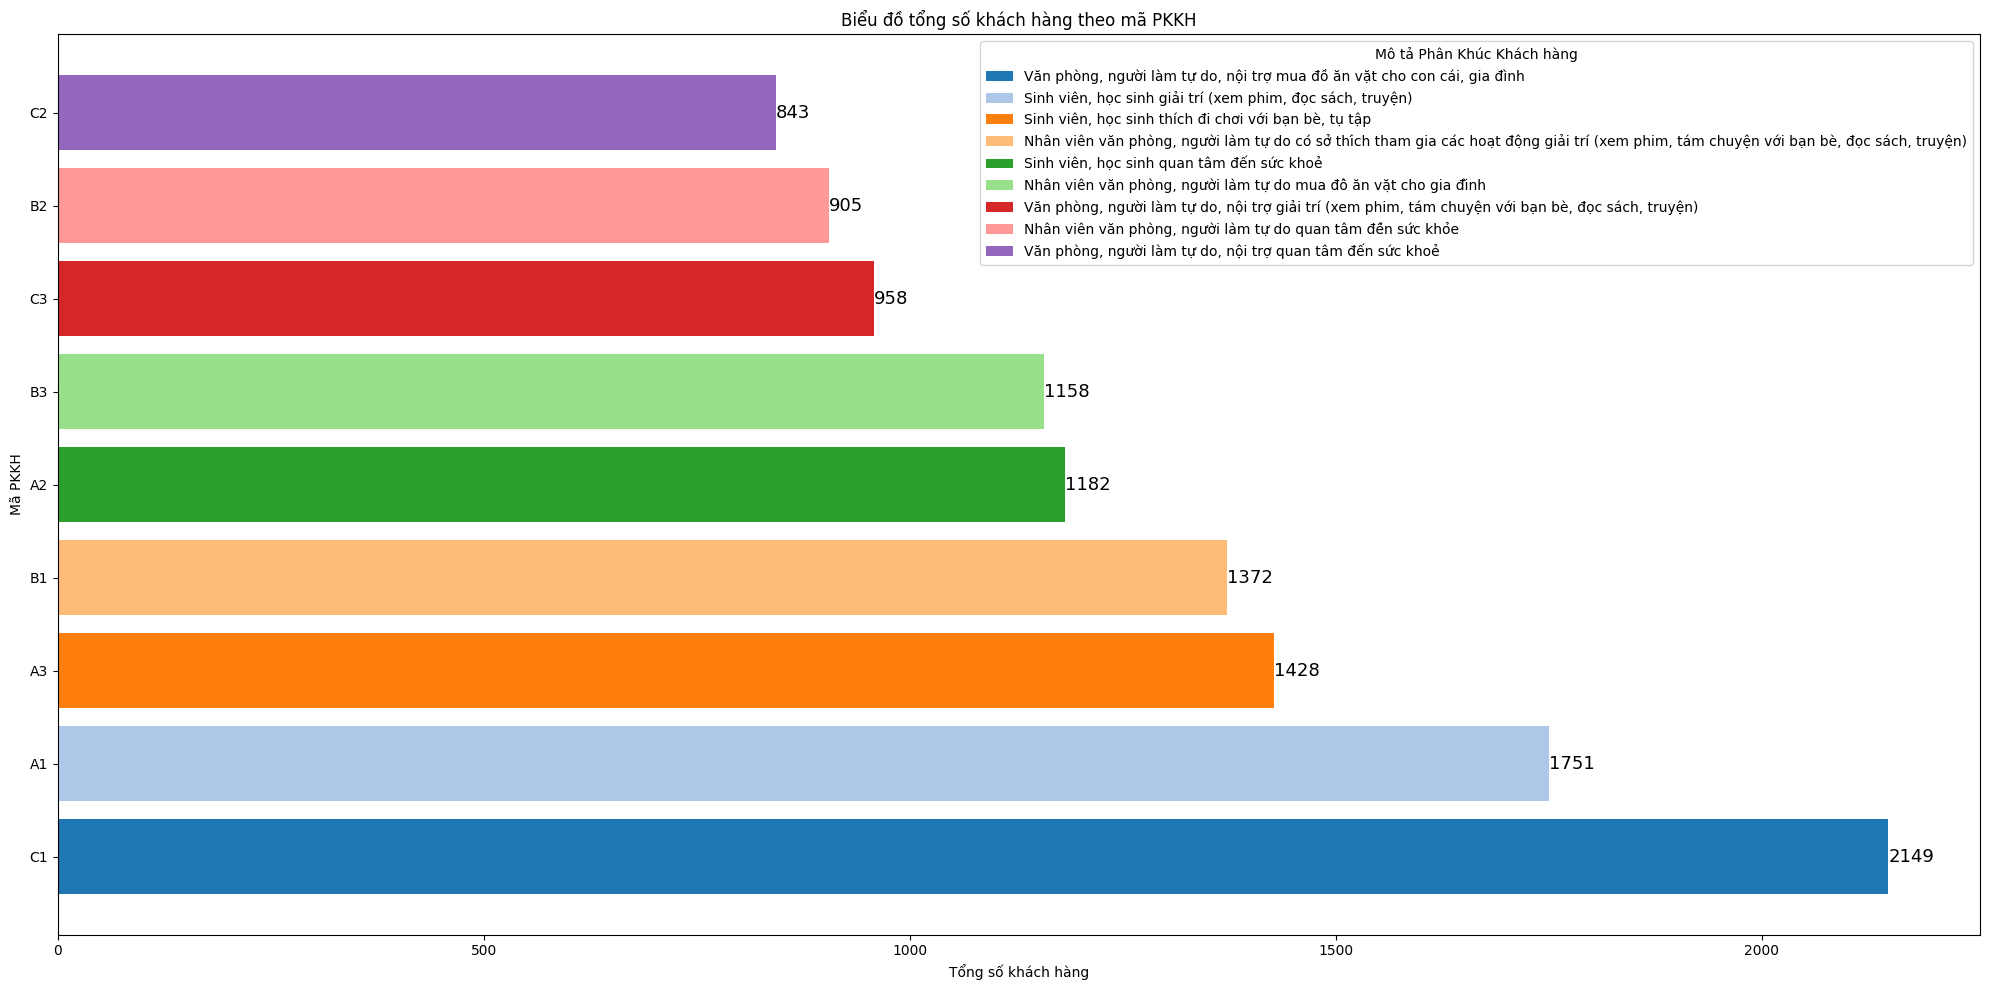

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
customers_by_item = data.groupby(['Mô tả Phân Khúc Khách hàng', 'Mã PKKH'])['Mã khách hàng'].nunique().reset_index(name='Tổng số khách hàng')
customers_by_item = customers_by_item.sort_values(by='Tổng số khách hàng', ascending=False)
colors = plt.cm.tab20.colors[:len(customers_by_item)]
plt.figure(figsize=(20, 10))
bars = plt.barh(customers_by_item['Mã PKKH'], customers_by_item['Tổng số khách hàng'], color=colors)
for bar, label in zip(bars, customers_by_item['Tổng số khách hàng']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{label}',
             va='center', ha='left', fontsize=13)
plt.xlabel('Tổng số khách hàng')
plt.ylabel('Mã PKKH')
plt.title('Biểu đồ tổng số khách hàng theo mã PKKH')
plt.tight_layout()
legend_labels = customers_by_item['Mô tả Phân Khúc Khách hàng']
plt.legend(bars, legend_labels, title='Mô tả Phân Khúc Khách hàng', loc='upper right', ncol=1)
plt.show()

**2. Doanh Thu từ các nhóm hàng**

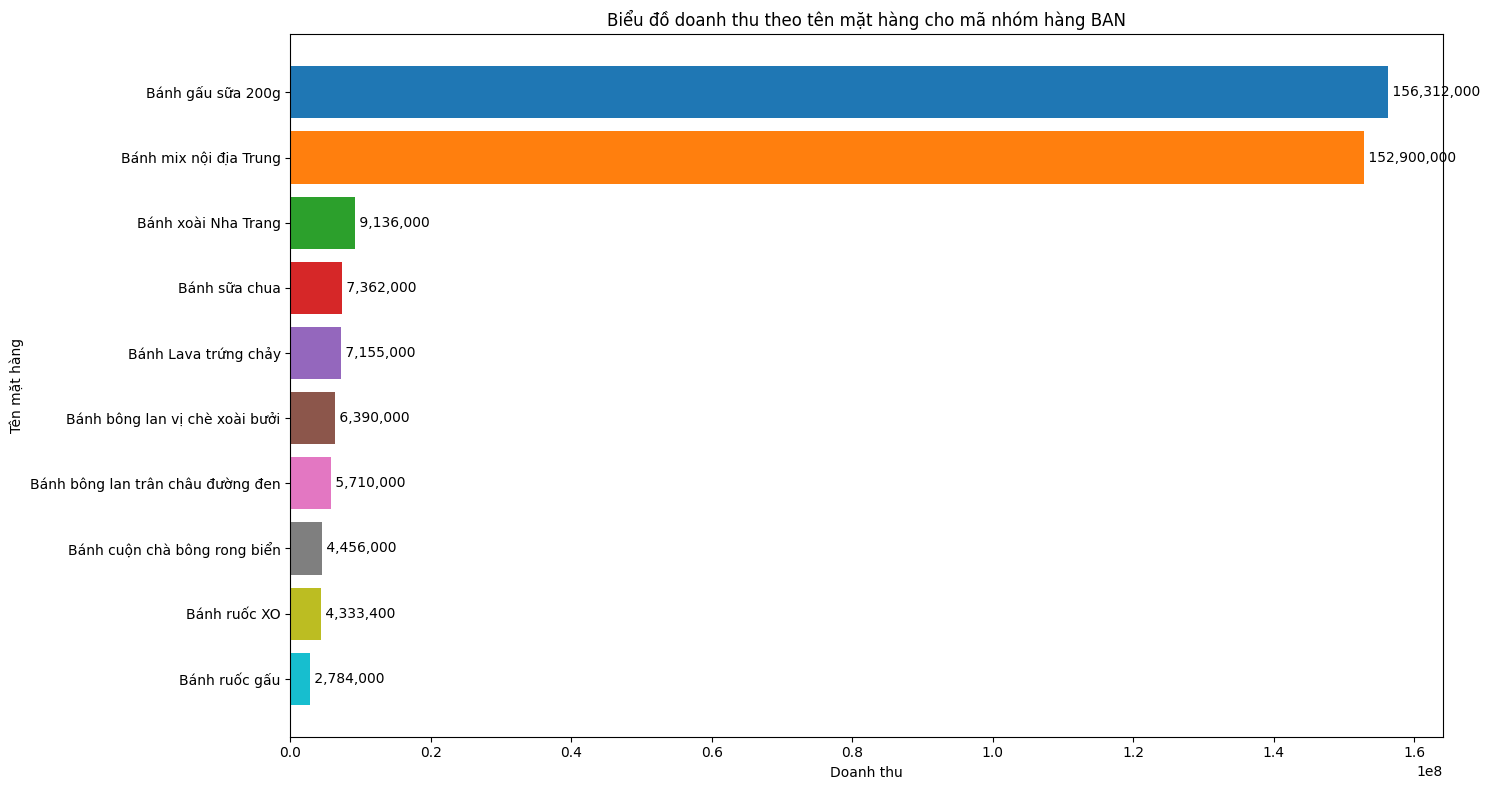

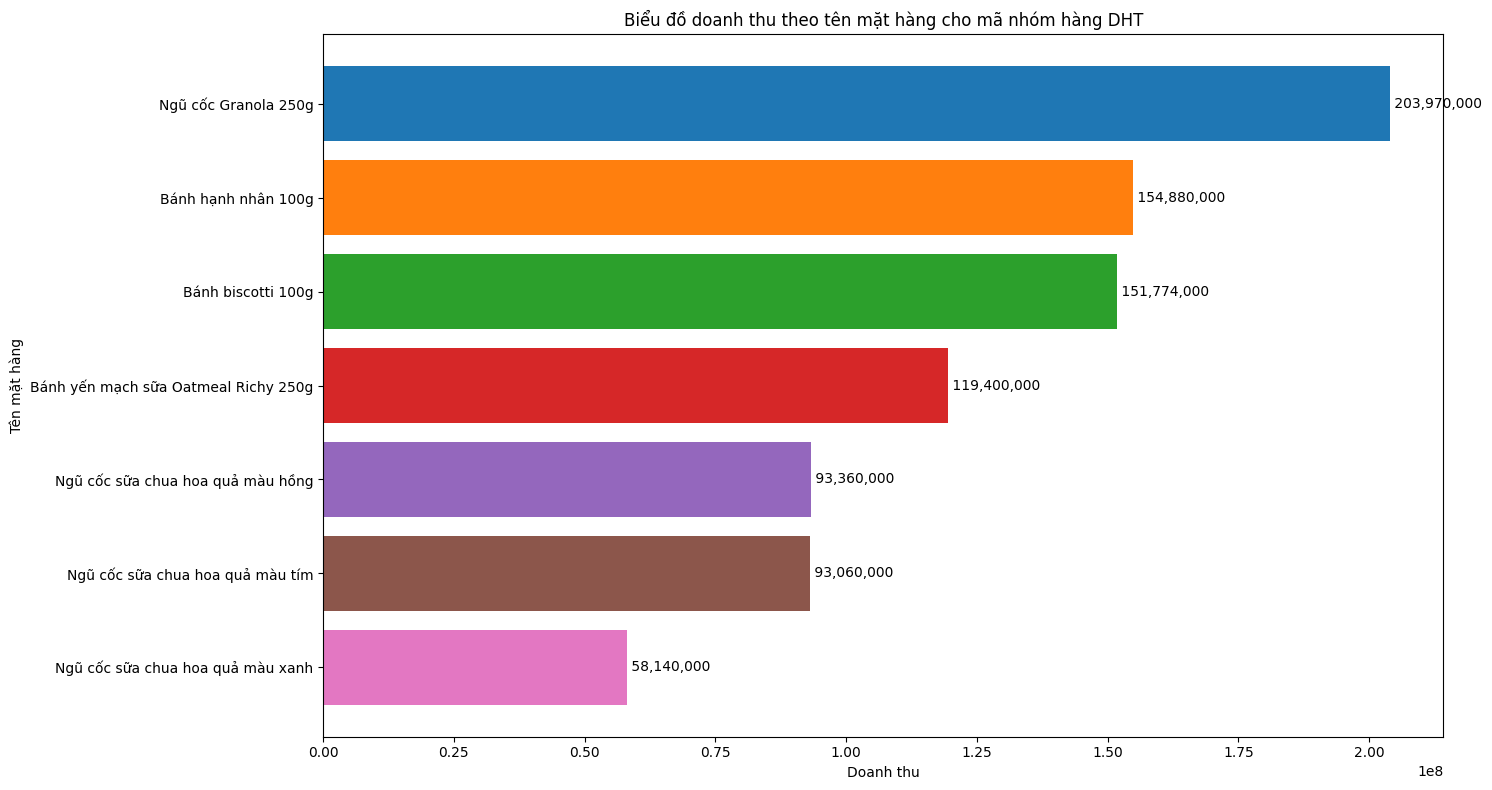

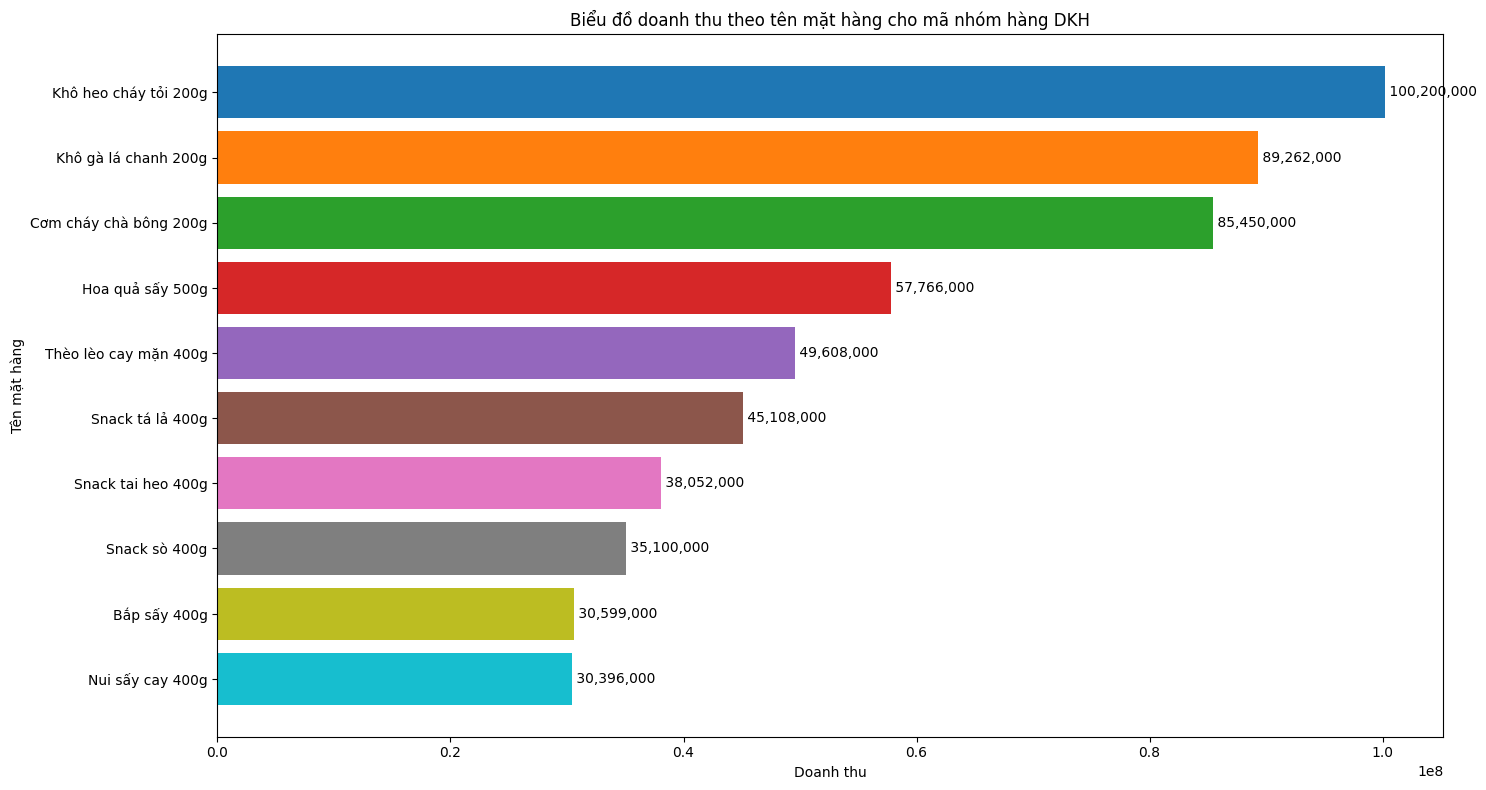

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
revenue_by_item = data.groupby(['Mã nhóm hàng', 'Tên mặt hàng'])['Amount'].sum().reset_index(name='Doanh thu')
ma_nhom_hang_list = revenue_by_item['Mã nhóm hàng'].unique()
for ma_nhom_hang in ma_nhom_hang_list:
    revenue_ma_nhom_hang = revenue_by_item[revenue_by_item['Mã nhóm hàng'] == ma_nhom_hang]
    revenue_ma_nhom_hang_sorted = revenue_ma_nhom_hang.sort_values(by='Doanh thu', ascending=False)
    colors = plt.cm.tab10.colors[:len(revenue_ma_nhom_hang_sorted)]
    plt.figure(figsize=(15, 8))
    bars = plt.barh(revenue_ma_nhom_hang_sorted['Tên mặt hàng'], revenue_ma_nhom_hang_sorted['Doanh thu'], color=colors)
    for bar, label in zip(bars, revenue_ma_nhom_hang_sorted['Doanh thu']):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{label: ,}',
                 va='center', ha='left', fontsize=10)
    plt.xlabel('Doanh thu')
    plt.ylabel('Tên mặt hàng')
    plt.title(f'Biểu đồ doanh thu theo tên mặt hàng cho mã nhóm hàng {ma_nhom_hang}')
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

**3.Số lượng bán ra ở mỗi mặt hàng**

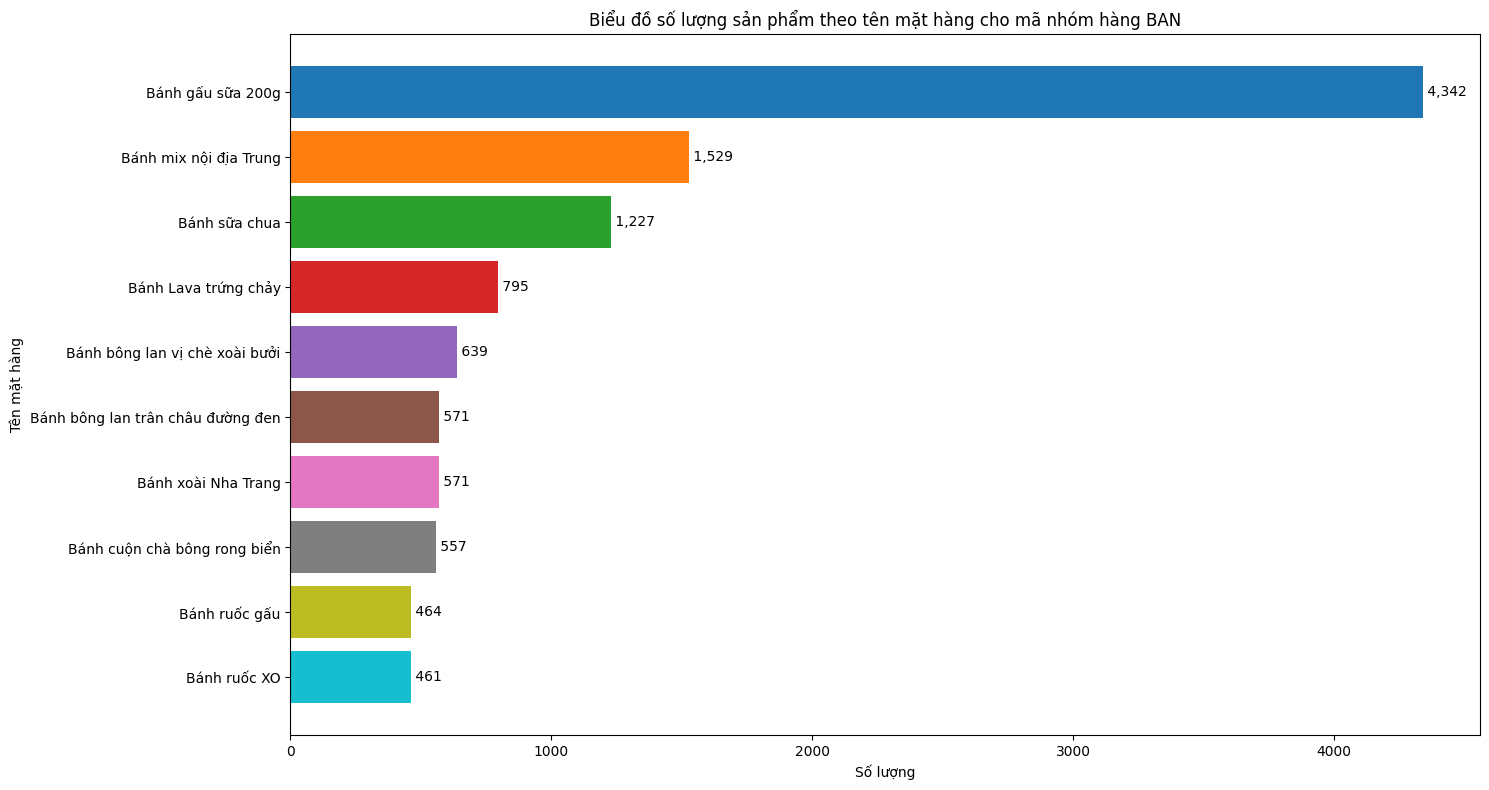

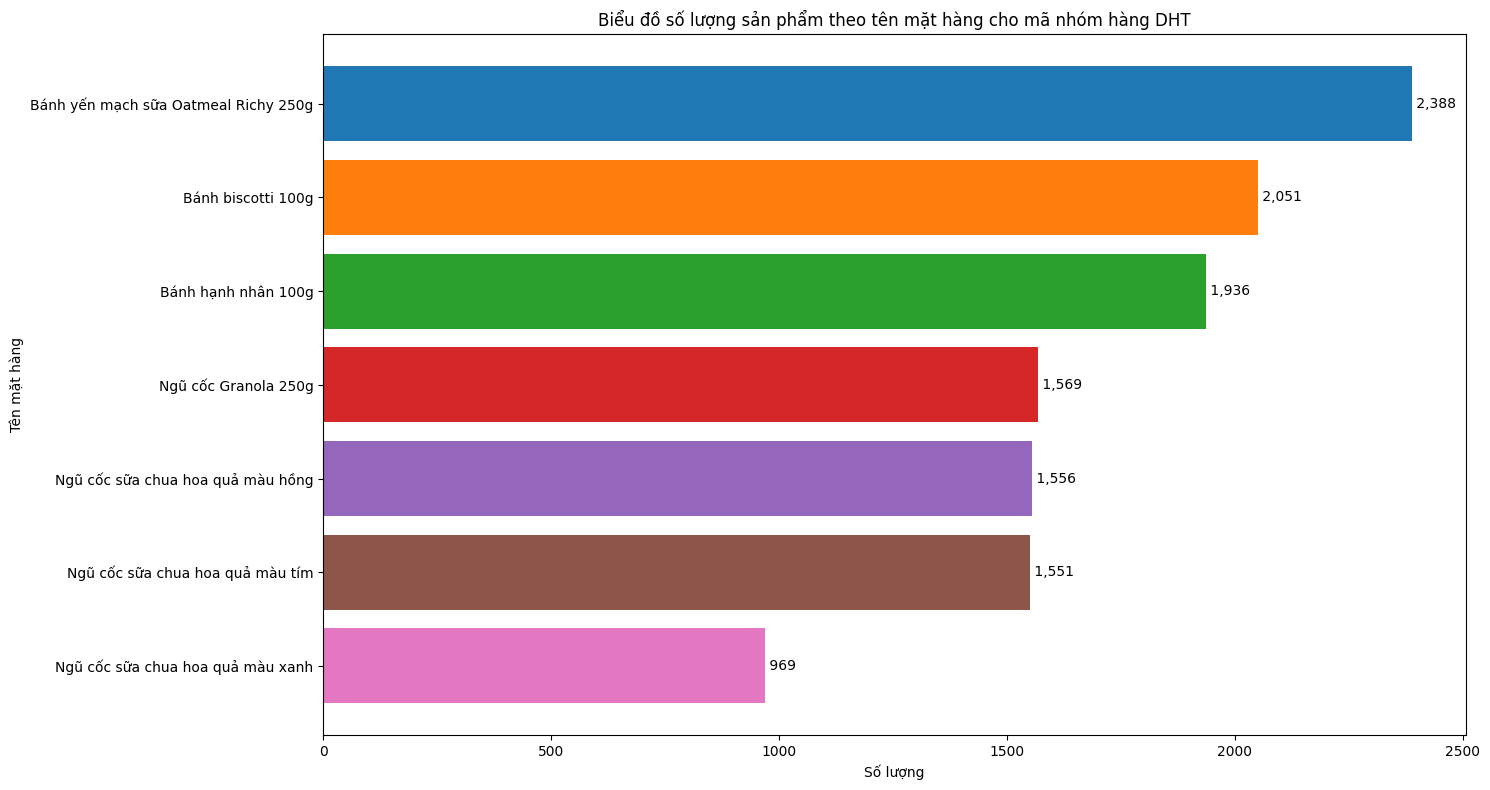

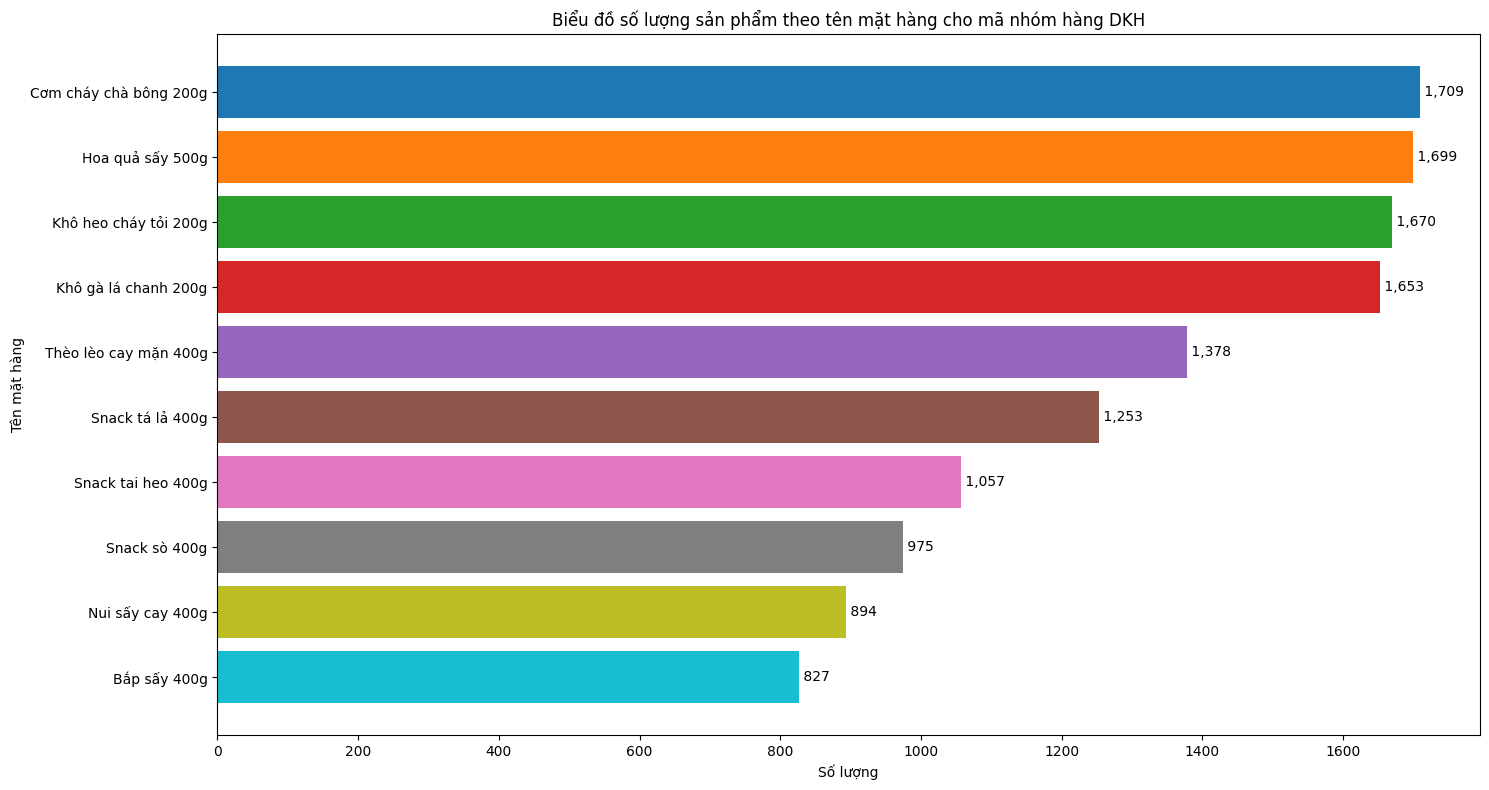

In [7]:
# Thay vì tính tổng doanh thu, tính tổng số lượng sản phẩm
quantity_by_item = data.groupby(['Mã nhóm hàng', 'Tên mặt hàng'])['SL'].sum().reset_index(name='Số lượng')

# Đối với mỗi mã nhóm hàng, tính tổng số lượng sản phẩm và vẽ biểu đồ tương ứng
for ma_nhom_hang in ma_nhom_hang_list:
    quantity_ma_nhom_hang = quantity_by_item[quantity_by_item['Mã nhóm hàng'] == ma_nhom_hang]
    quantity_ma_nhom_hang_sorted = quantity_ma_nhom_hang.sort_values(by='Số lượng', ascending=False)
    colors = plt.cm.tab10.colors[:len(quantity_ma_nhom_hang_sorted)]
    plt.figure(figsize=(15, 8))
    bars = plt.barh(quantity_ma_nhom_hang_sorted['Tên mặt hàng'], quantity_ma_nhom_hang_sorted['Số lượng'], color=colors)
    for bar, label in zip(bars, quantity_ma_nhom_hang_sorted['Số lượng']):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{label: ,}',
                 va='center', ha='left', fontsize=10)
    plt.xlabel('Số lượng')
    plt.ylabel('Tên mặt hàng')
    plt.title(f'Biểu đồ số lượng sản phẩm theo tên mặt hàng cho mã nhóm hàng {ma_nhom_hang}')
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()


**4. Phần doanh thu từ các nhóm PKKH**

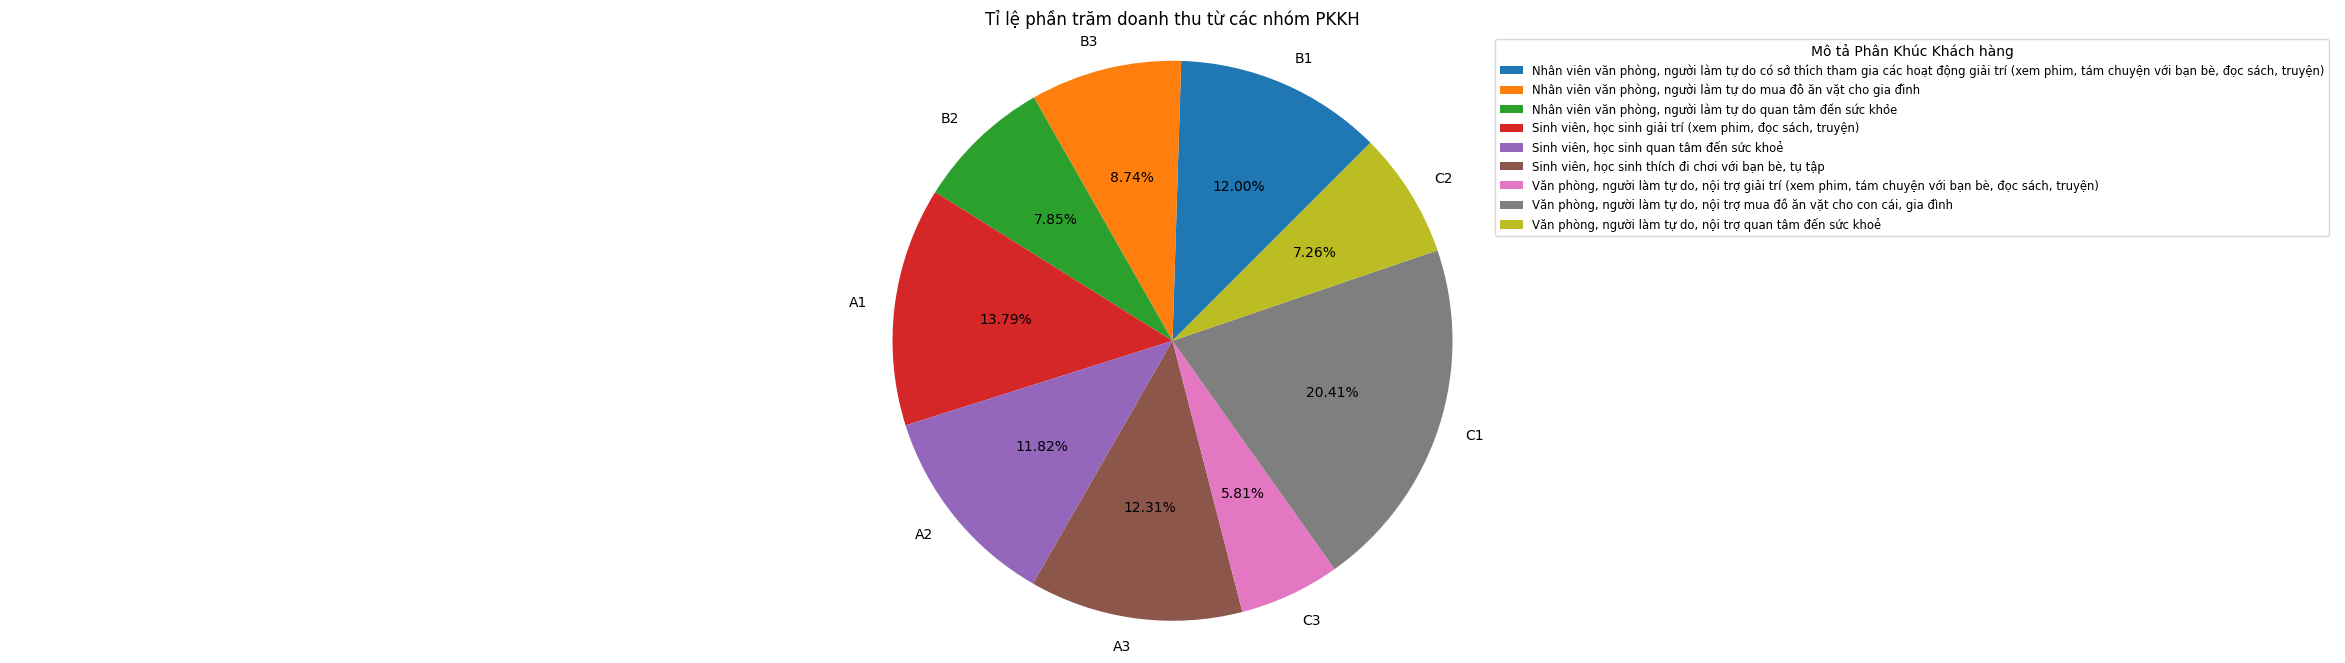

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
revenue_by_group = data.groupby(['Mô tả Phân Khúc Khách hàng', 'Mã PKKH'])['Amount'].sum().reset_index()
plt.figure(figsize=(30, 8))
plt.pie(revenue_by_group['Amount'], labels=revenue_by_group['Mã PKKH'], autopct='%1.2f%%', startangle=45)
plt.title('Tỉ lệ phần trăm doanh thu từ các nhóm PKKH')
plt.axis('equal')
legend_labels = revenue_by_group['Mô tả Phân Khúc Khách hàng']
plt.legend(legend_labels, title='Mô tả Phân Khúc Khách hàng', loc='upper right', fontsize='small')
plt.show()

**5.Biến động doanh thu của các nhóm sản phẩm**

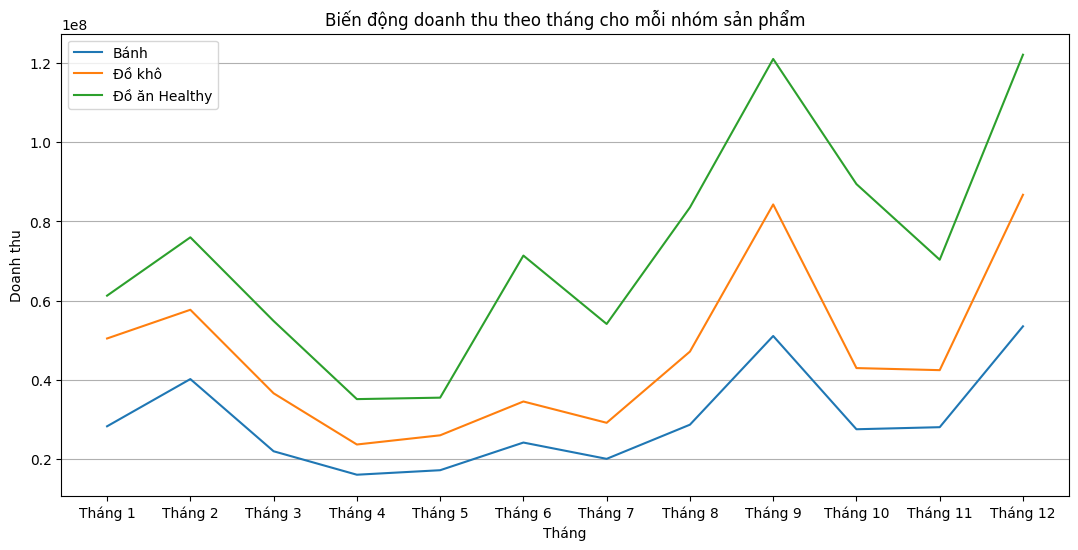

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data['Thời gian tạo đơn'] = pd.to_datetime(data['Thời gian tạo đơn'])
data['Tháng'] = data['Thời gian tạo đơn'].dt.month
doanh_thu_theo_thang = data.groupby(['Tên nhóm hàng', 'Tháng'])['Amount'].sum().reset_index()
plt.figure(figsize=(13, 6))
for nhom_san_pham in doanh_thu_theo_thang['Tên nhóm hàng'].unique():
    du_lieu_nhom = doanh_thu_theo_thang[doanh_thu_theo_thang['Tên nhóm hàng'] == nhom_san_pham]
    plt.plot(du_lieu_nhom['Tháng'], du_lieu_nhom['Amount'], label=nhom_san_pham)
plt.title('Biến động doanh thu theo tháng cho mỗi nhóm sản phẩm')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks((range(1, 13)), ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4','Tháng 5','Tháng 6','Tháng 7','Tháng 8','Tháng 9','Tháng 10','Tháng 11','Tháng 12'])
plt.legend()
plt.grid(True, which='major', axis='y')
plt.show()

**6.Số lượng khách hàng đã mua lặp lại trong từng PKKH-SAI-**

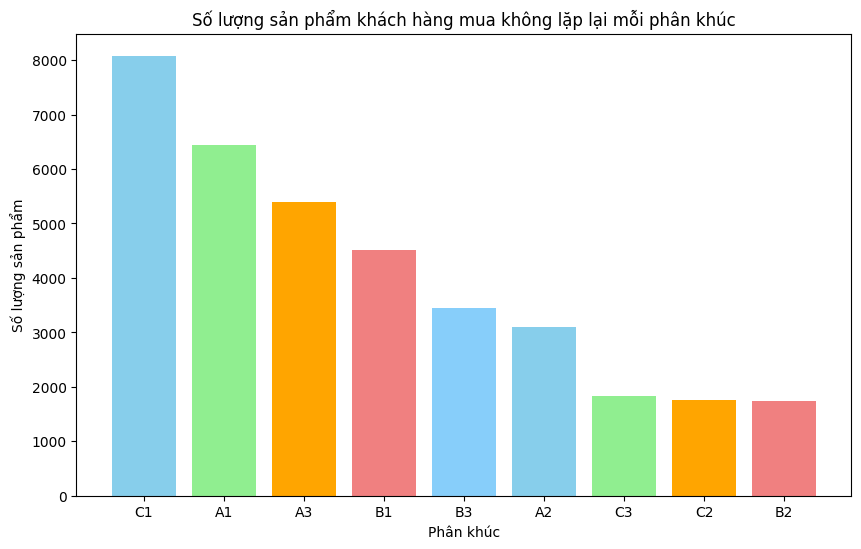

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Tính số lượng hàng trong mỗi nhóm 'Mã PKKH'
count_per_pkkh = df.groupby('Mã PKKH').count()

# Lọc các hàng có số lượng hàng trong nhóm 'Mã PKKH' khác 1
filtered_df = df.loc[df['Mã PKKH'].isin(count_per_pkkh[count_per_pkkh != 1].index)]

# Tính tổng số lượng sản phẩm mỗi mã PKKH
product_count_per_segment = filtered_df.groupby('Mã PKKH')['SL'].sum().reset_index()
product_count_per_segment = product_count_per_segment.sort_values(by='SL', ascending=False)

# Tạo mảng các màu cho biểu đồ cột
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(product_count_per_segment['Mã PKKH'], product_count_per_segment['SL'], color=colors)
plt.xlabel('Phân khúc')
plt.ylabel('Số lượng sản phẩm')
plt.title('Số lượng sản phẩm khách hàng mua không lặp lại mỗi phân khúc')
plt.show()



**7. Hành vi mua lặp lại từng tháng**

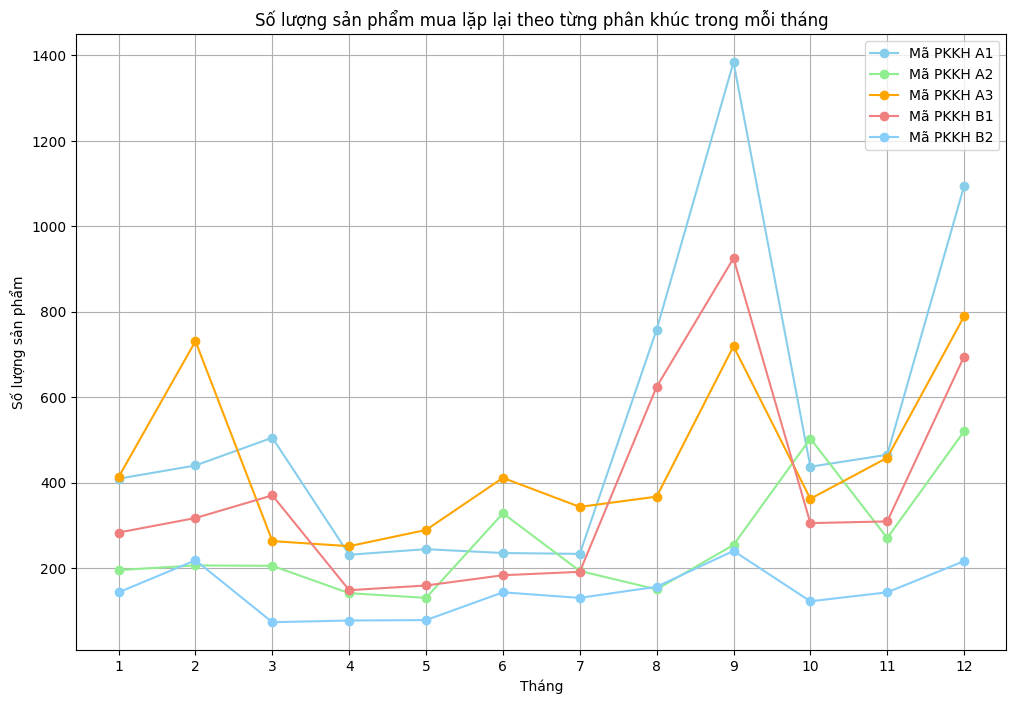

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
df['Thời gian'] = pd.to_datetime(df['Thời gian tạo đơn'])
df['Tháng'] = df['Thời gian'].dt.month
count_repeat_per_pkkh_month = df.groupby(['Mã PKKH', 'Tháng'])['Tên khách hàng'].nunique()
filtered_df = df.loc[df['Mã PKKH'].isin(count_repeat_per_pkkh_month[count_repeat_per_pkkh_month != 1].index.get_level_values(0))]
product_count_per_segment_month = filtered_df.groupby(['Mã PKKH', 'Tháng'])['SL'].sum().reset_index()
product_count_per_segment_month = product_count_per_segment_month.sort_values(by=['Mã PKKH', 'Tháng'])
plt.figure(figsize=(12, 8))
for pkkh, color in zip(product_count_per_segment_month['Mã PKKH'].unique(), colors):
    pkkh_data = product_count_per_segment_month[product_count_per_segment_month['Mã PKKH'] == pkkh]
    plt.plot(pkkh_data['Tháng'], pkkh_data['SL'], marker='o', label=f'Mã PKKH {pkkh}', color=color)
plt.xlabel('Tháng')
plt.ylabel('Số lượng sản phẩm')
plt.title('Số lượng sản phẩm mua lặp lại theo từng phân khúc trong mỗi tháng')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

**8. Tổng số khách hàng trong phân khúc khách hàng**

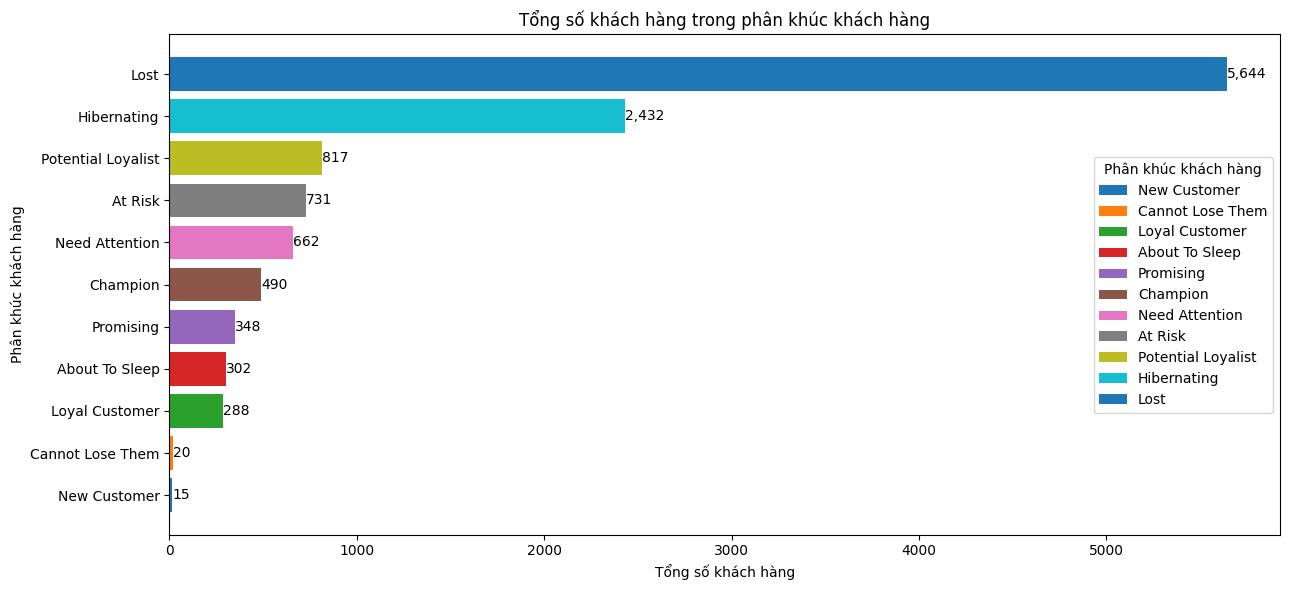

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
customer_by_segment = data.groupby('Segment')['Mã khách hàng'].nunique().sort_values(ascending=True)
colors = plt.cm.tab10.colors[:len(customer_by_segment)]
plt.figure(figsize=(13, 6))
bars = plt.barh(customer_by_segment.index, customer_by_segment.values, color=colors)
for bar, label in zip(bars, customer_by_segment.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:,.0f}'.format(label),
             va='center', ha='left', fontsize=10)
plt.xlabel('Tổng số khách hàng')
plt.ylabel('Phân khúc khách hàng')
plt.title('Tổng số khách hàng trong phân khúc khách hàng')
plt.tight_layout()
plt.legend(bars, customer_by_segment.index, title='Phân khúc khách hàng', loc='right')
plt.show()

**9. Tổng số khách hàng trong phân khúc khách hàng theo nhóm sản phẩm**

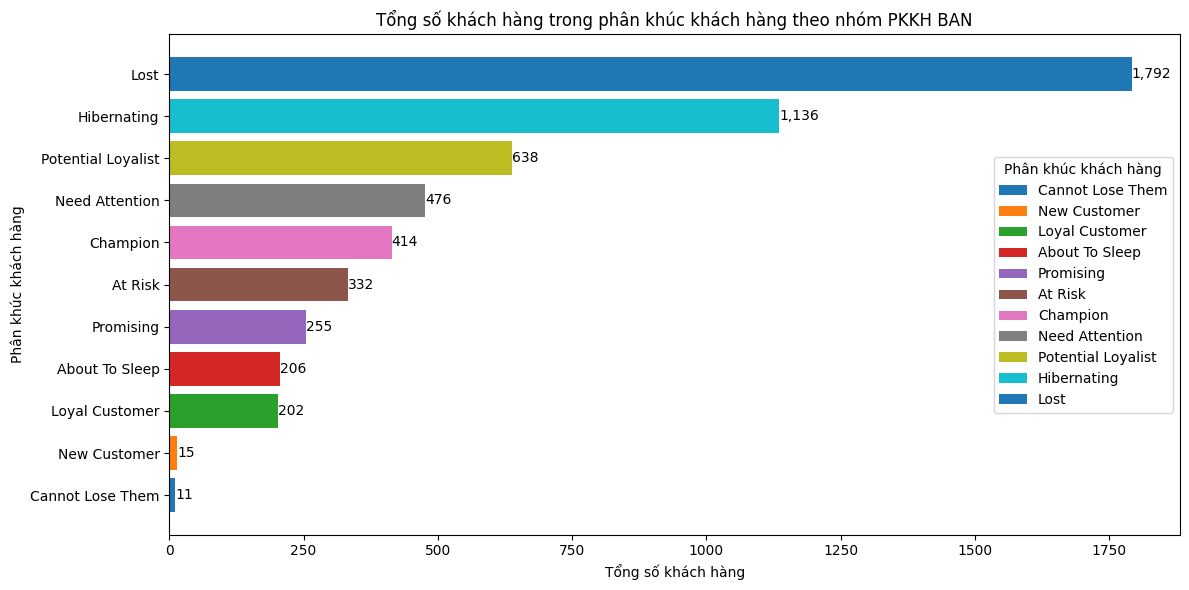

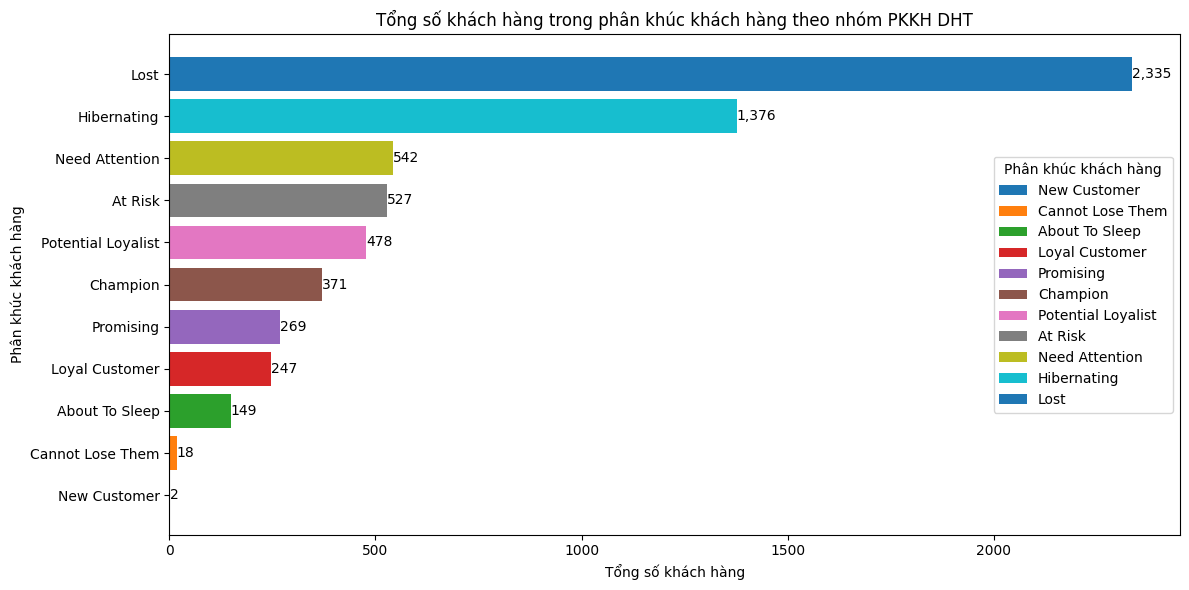

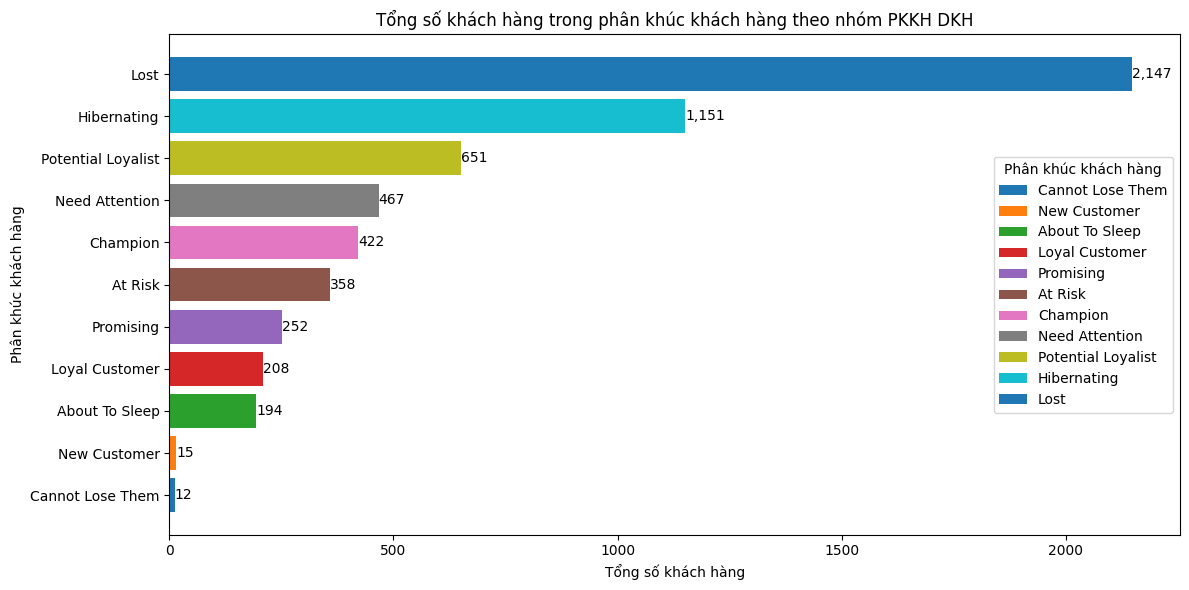

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pkkh_groups = data['Mã nhóm hàng'].unique()
for pkkh_group in pkkh_groups:
    group_data = data[data['Mã nhóm hàng'] == pkkh_group]
    customer_by_segment = group_data.groupby('Segment')['Mã khách hàng'].nunique().sort_values(ascending=True)
    colors = plt.cm.tab10.colors[:len(customer_by_segment)]
    plt.figure(figsize=(12, 6))
    bars = plt.barh(customer_by_segment.index, customer_by_segment.values, color=colors)
    for bar, label in zip(bars, customer_by_segment.values):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:,.0f}'.format(label),
                 va='center', ha='left', fontsize=10)
    plt.xlabel('Tổng số khách hàng')
    plt.ylabel('Phân khúc khách hàng')
    plt.title(f'Tổng số khách hàng trong phân khúc khách hàng theo nhóm PKKH {pkkh_group}')
    plt.tight_layout()
    plt.legend(bars, customer_by_segment.index, title='Phân khúc khách hàng', loc='right')
    plt.show()

**Tổng số khách hàng trong phân khúc khách hàng theo nhóm sản phẩm (2)**

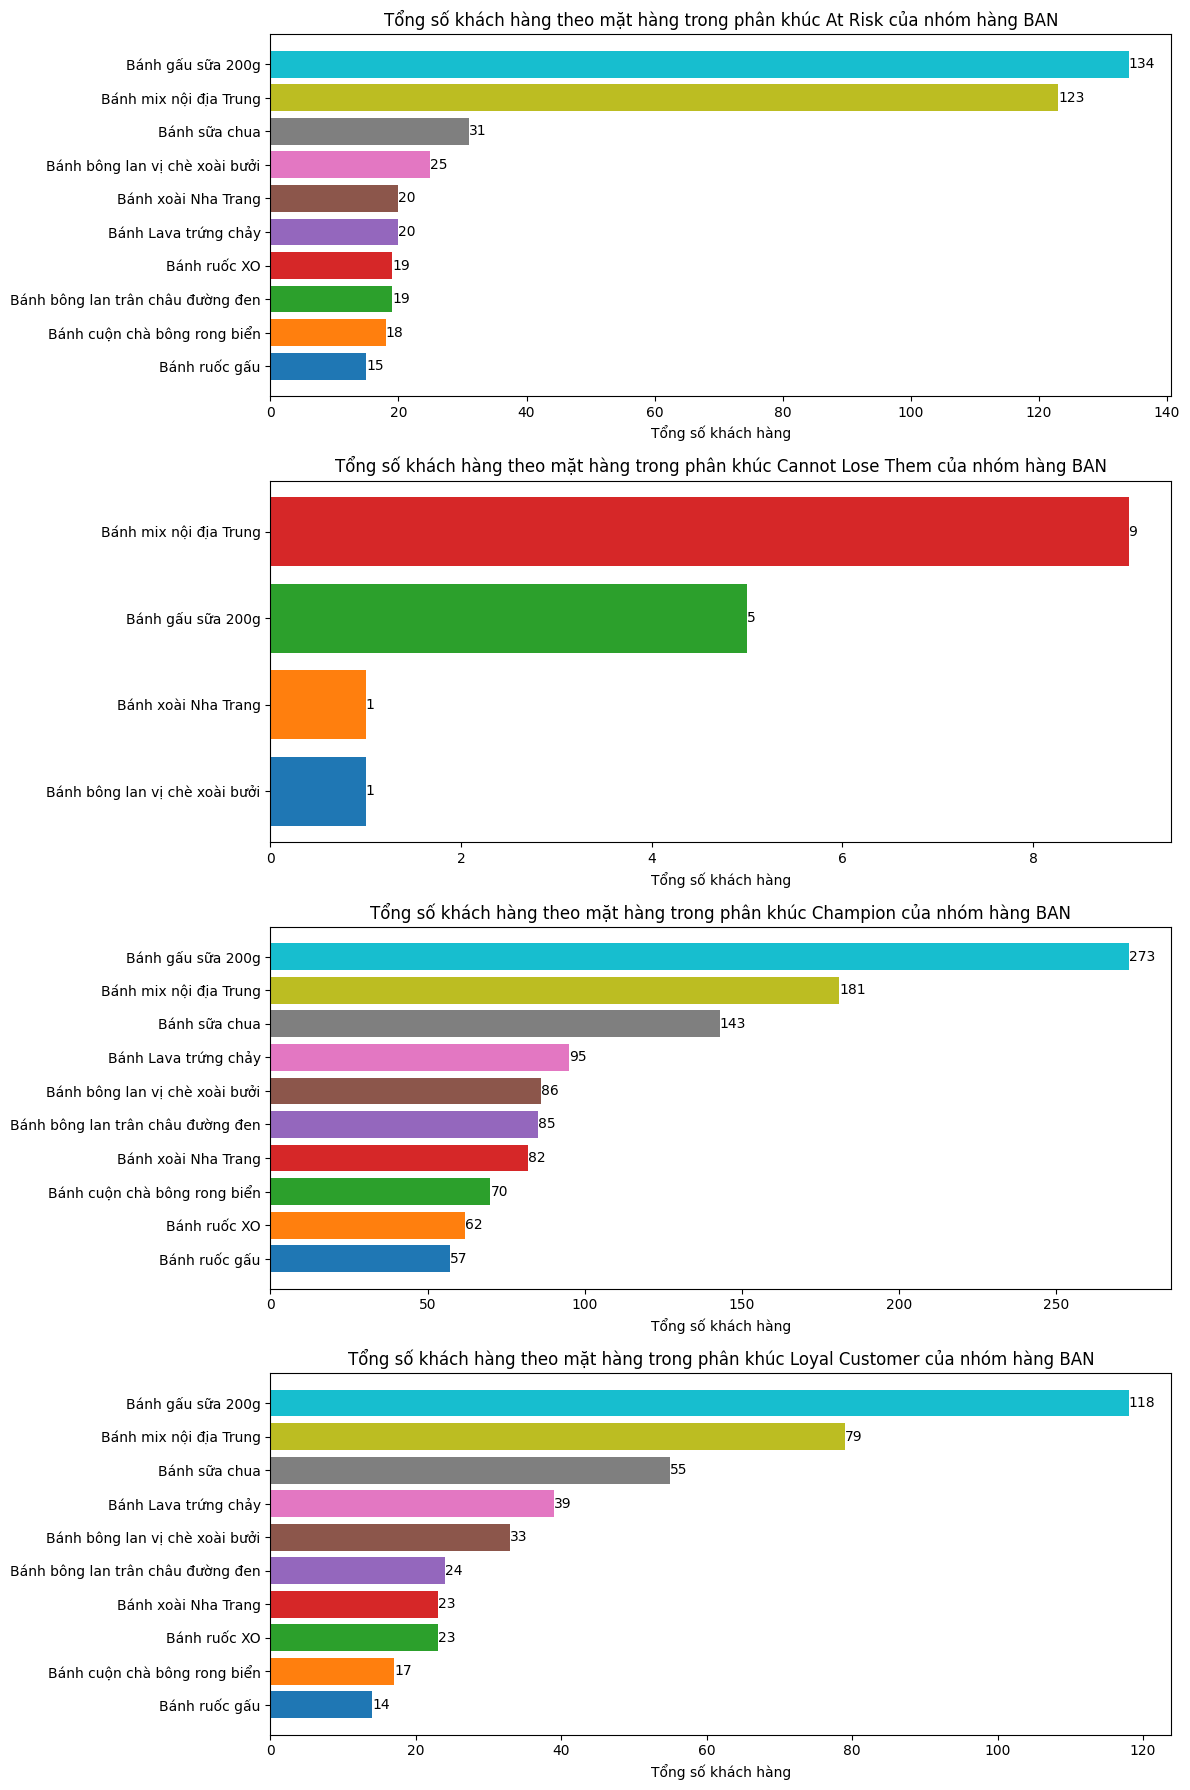

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
selected_segments = ['At Risk', 'Cannot Lose Them', 'Champion', 'Loyal Customer']
selected_group = 'BAN'
filtered_data = data[(data['Mã nhóm hàng'] == selected_group) & (data['Segment'].isin(selected_segments))]
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))
for index, segment in enumerate(selected_segments):
    segment_data = filtered_data[filtered_data['Segment'] == segment]
    customer_by_product = segment_data.groupby('Tên mặt hàng')['Mã khách hàng'].nunique().sort_values(ascending=True)
    colors = plt.cm.tab10.colors[:len(customer_by_product)]

    axes[index].barh(customer_by_product.index, customer_by_product.values, color=colors)
    for bar, label in zip(axes[index].containers[0], customer_by_product.values):
        axes[index].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:,.0f}'.format(label),
                         va='center', ha='left', fontsize=10)
    axes[index].set_xlabel('Tổng số khách hàng')
    axes[index].set_title(f'Tổng số khách hàng theo mặt hàng trong phân khúc {segment} của nhóm hàng {selected_group}')
plt.tight_layout()
plt.show()

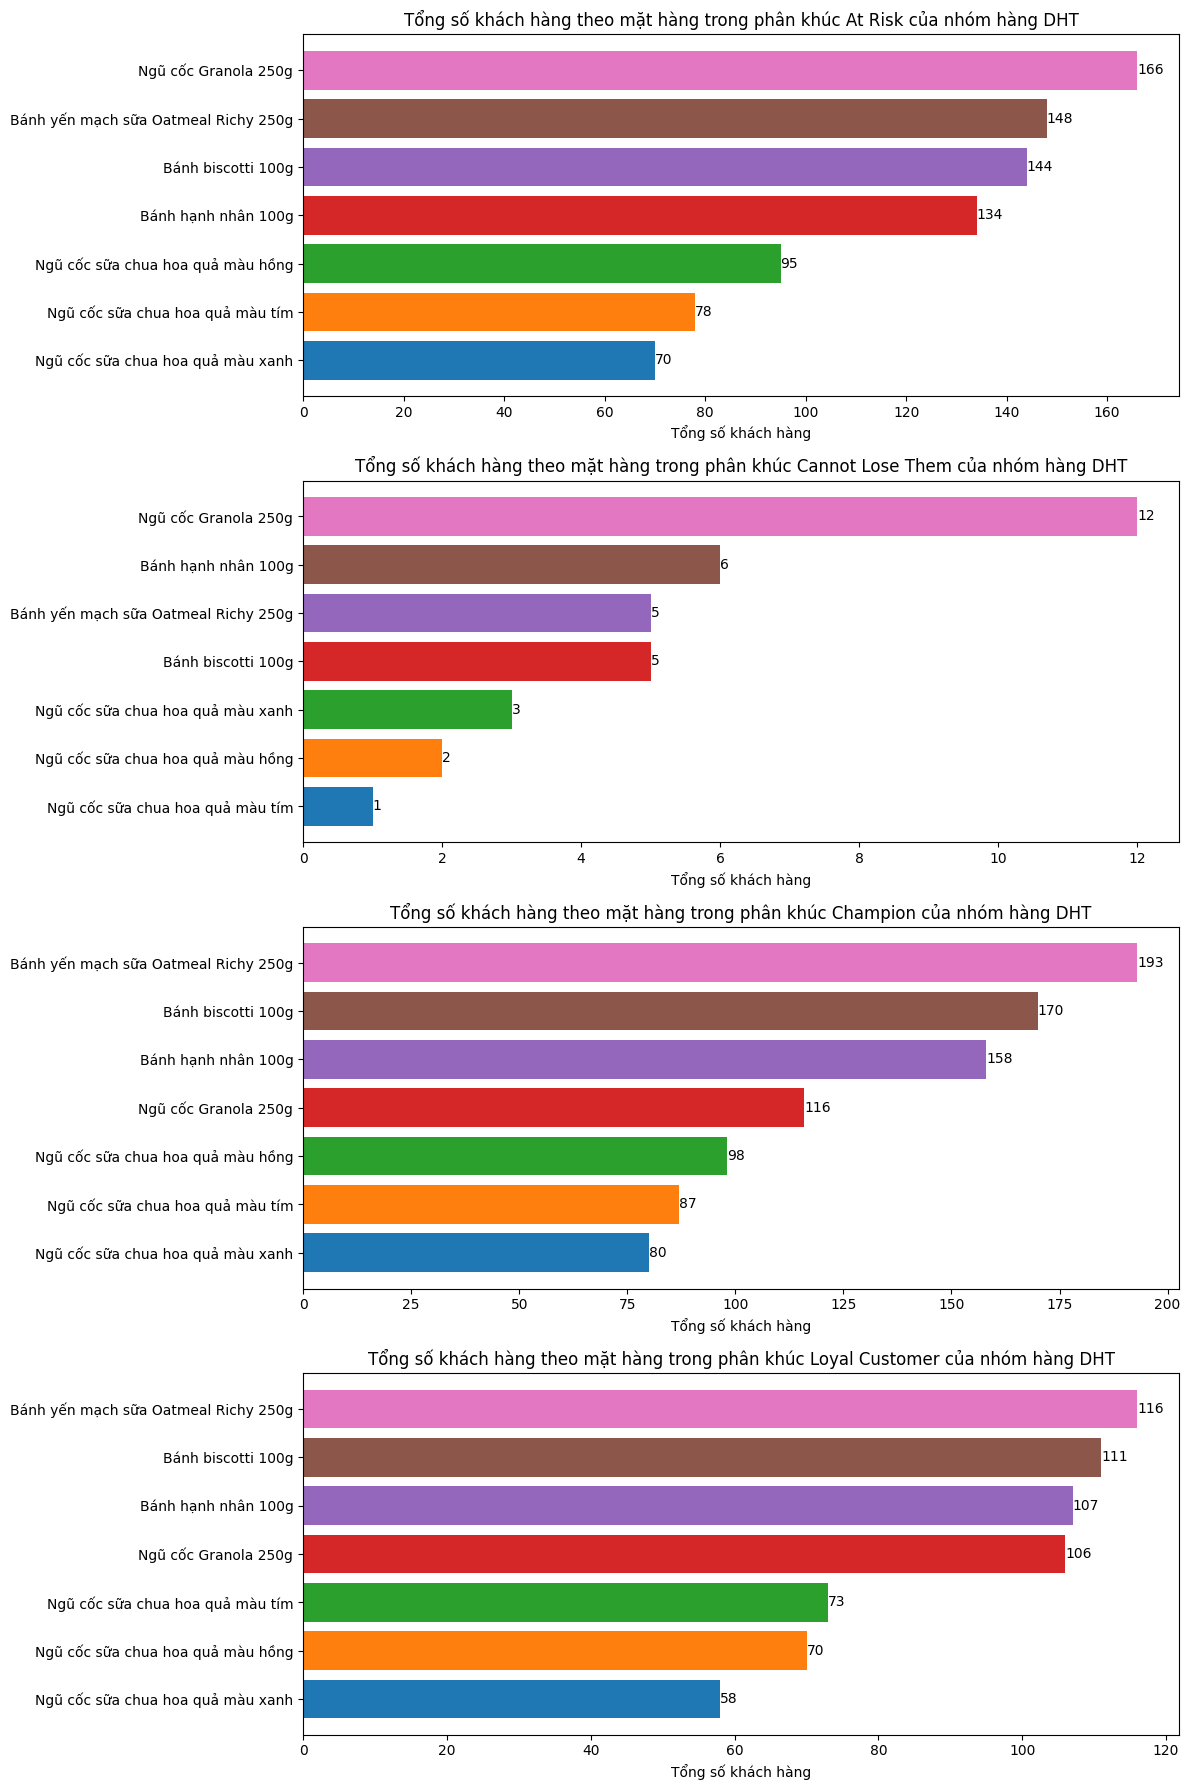

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
selected_segments = ['At Risk', 'Cannot Lose Them', 'Champion', 'Loyal Customer']
selected_group = 'DHT'
filtered_data = data[(data['Mã nhóm hàng'] == selected_group) & (data['Segment'].isin(selected_segments))]
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))
for index, segment in enumerate(selected_segments):
    segment_data = filtered_data[filtered_data['Segment'] == segment]
    customer_by_product = segment_data.groupby('Tên mặt hàng')['Mã khách hàng'].nunique().sort_values(ascending=True)
    colors = plt.cm.tab10.colors[:len(customer_by_product)]

    axes[index].barh(customer_by_product.index, customer_by_product.values, color=colors)
    for bar, label in zip(axes[index].containers[0], customer_by_product.values):
        axes[index].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:,.0f}'.format(label),
                         va='center', ha='left', fontsize=10)
    axes[index].set_xlabel('Tổng số khách hàng')
    axes[index].set_title(f'Tổng số khách hàng theo mặt hàng trong phân khúc {segment} của nhóm hàng {selected_group}')
plt.tight_layout()
plt.show()

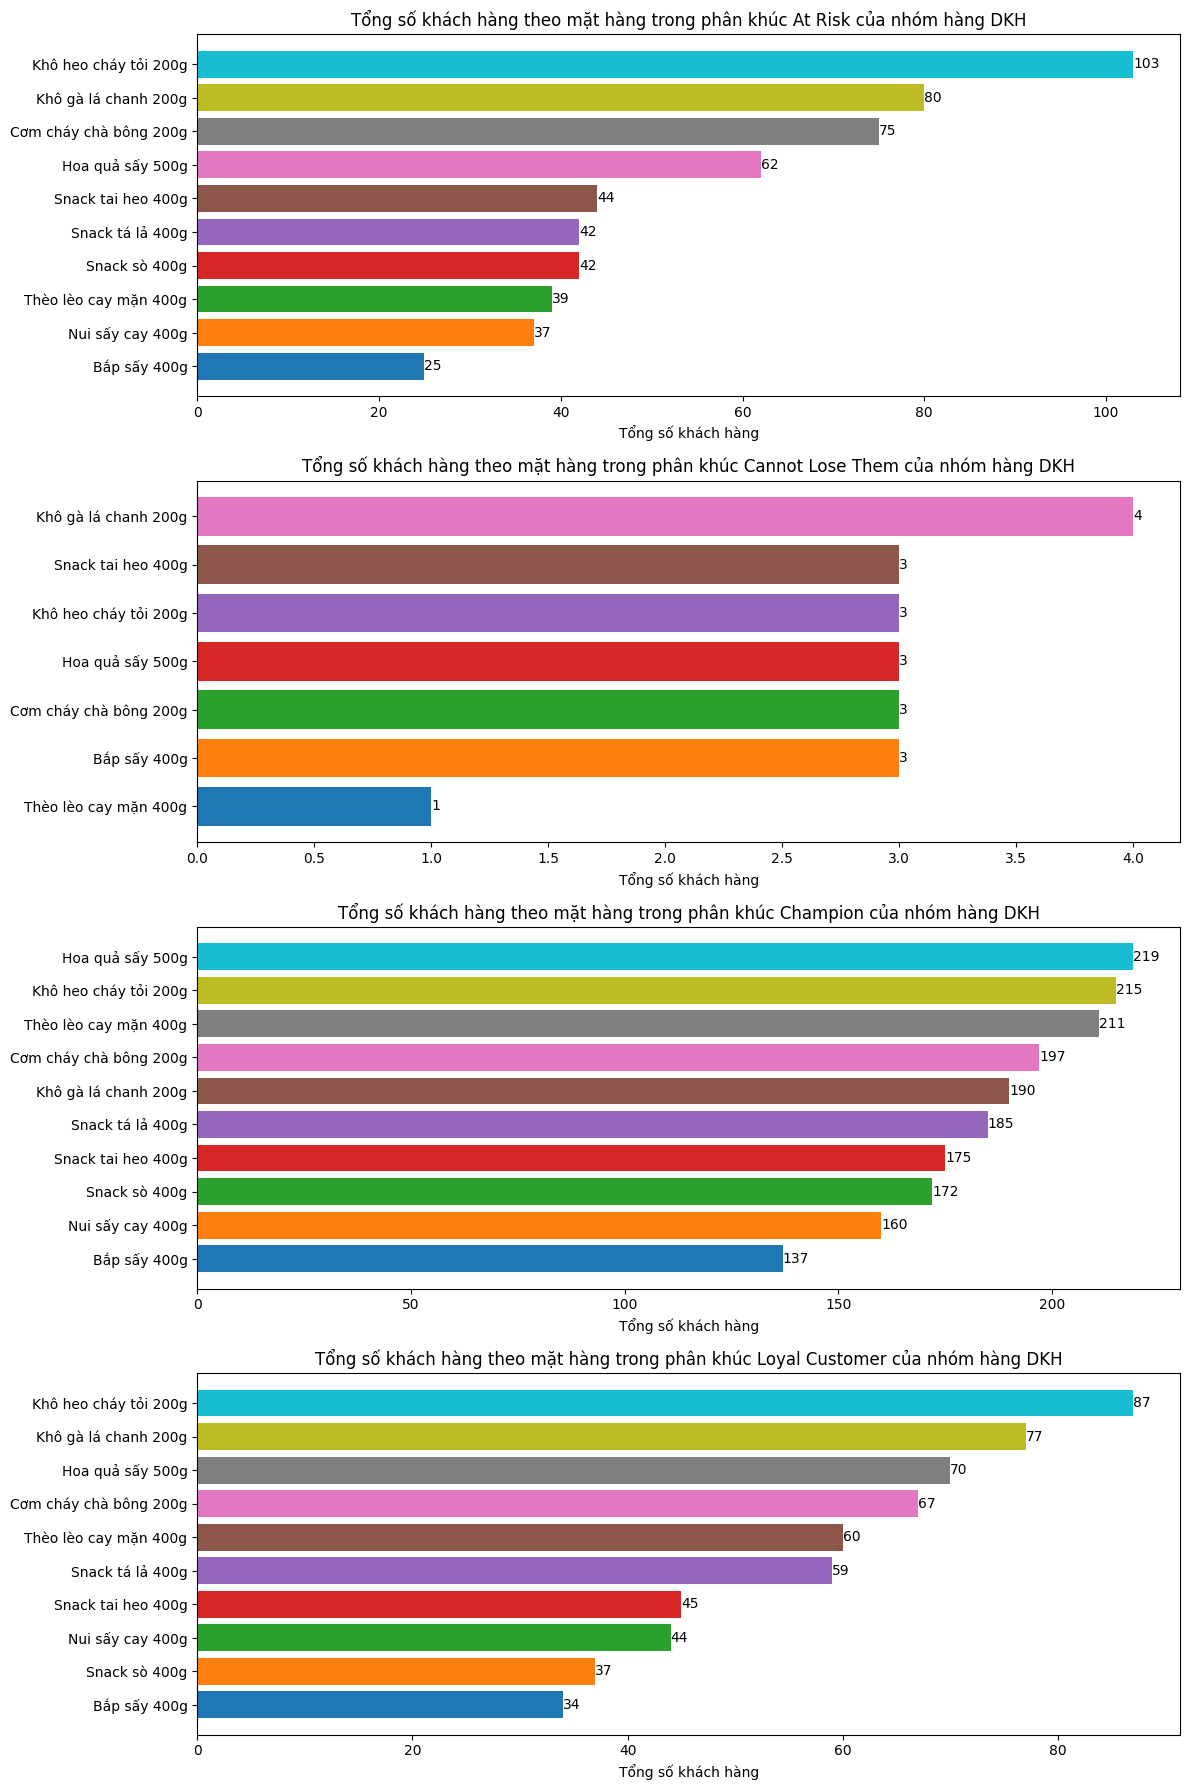

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
selected_segments = ['At Risk', 'Cannot Lose Them', 'Champion', 'Loyal Customer']
selected_group = 'DKH'
filtered_data = data[(data['Mã nhóm hàng'] == selected_group) & (data['Segment'].isin(selected_segments))]
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))
for index, segment in enumerate(selected_segments):
    segment_data = filtered_data[filtered_data['Segment'] == segment]
    customer_by_product = segment_data.groupby('Tên mặt hàng')['Mã khách hàng'].nunique().sort_values(ascending=True)
    colors = plt.cm.tab10.colors[:len(customer_by_product)]

    axes[index].barh(customer_by_product.index, customer_by_product.values, color=colors)
    for bar, label in zip(axes[index].containers[0], customer_by_product.values):
        axes[index].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:,.0f}'.format(label),
                         va='center', ha='left', fontsize=10)
    axes[index].set_xlabel('Tổng số khách hàng')
    axes[index].set_title(f'Tổng số khách hàng theo mặt hàng trong phân khúc {segment} của nhóm hàng {selected_group}')
plt.tight_layout()
plt.show()

**10.Tổng số khách hàng trong phân khúc khách hàng theo nhóm sản phẩm**

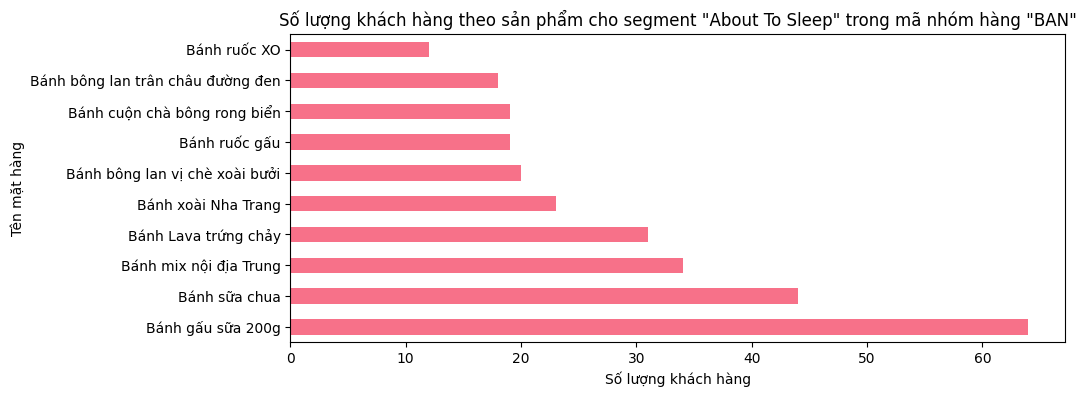

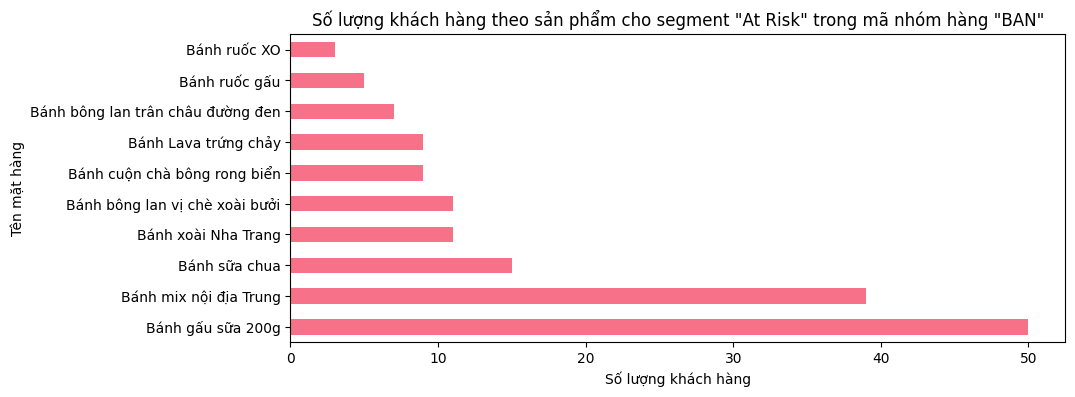

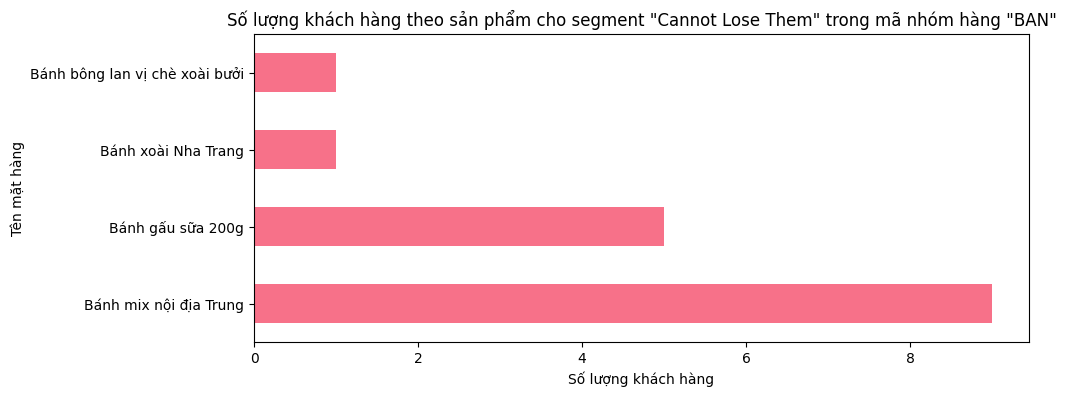

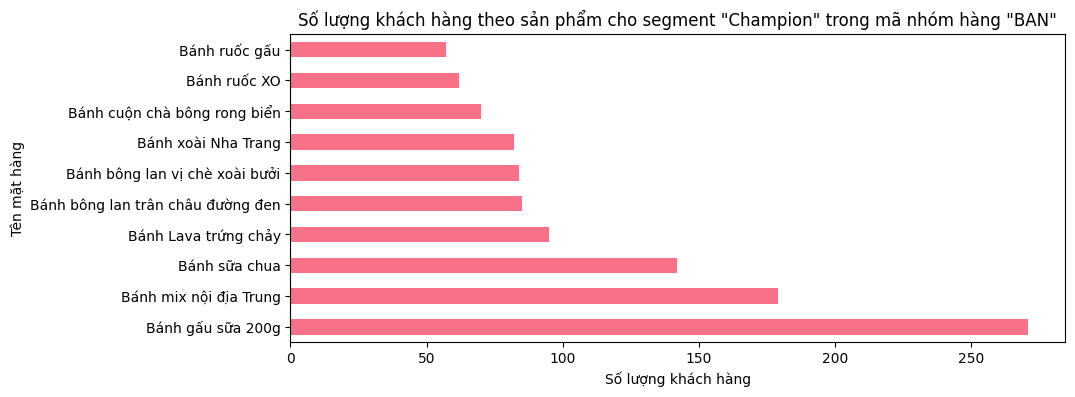

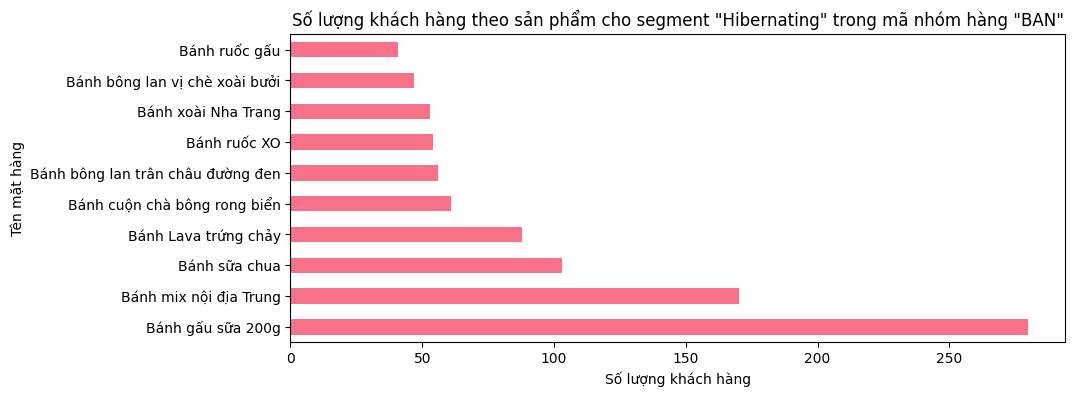

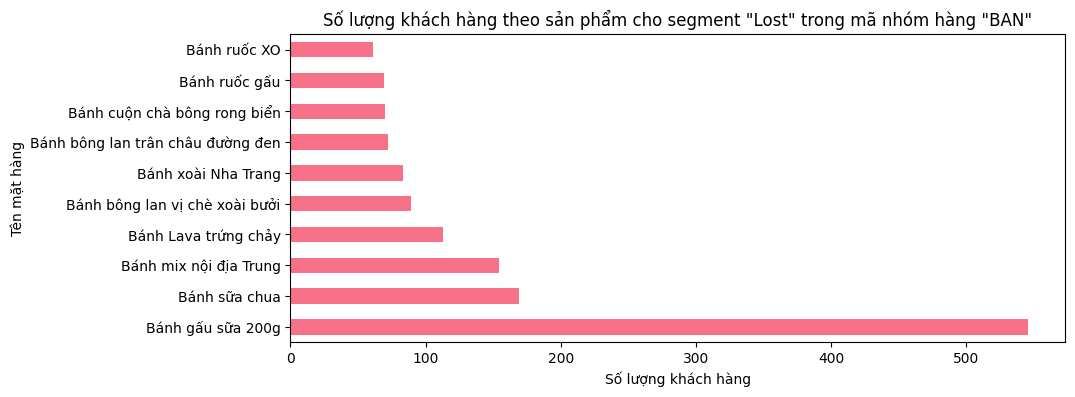

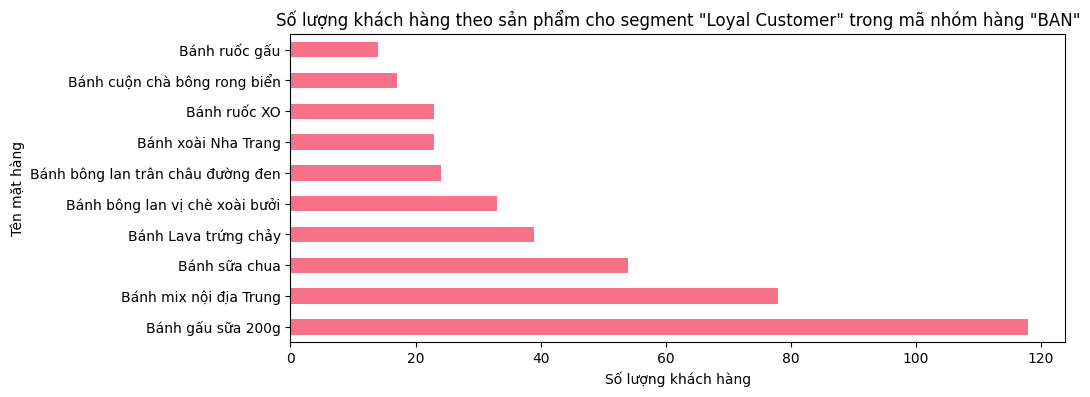

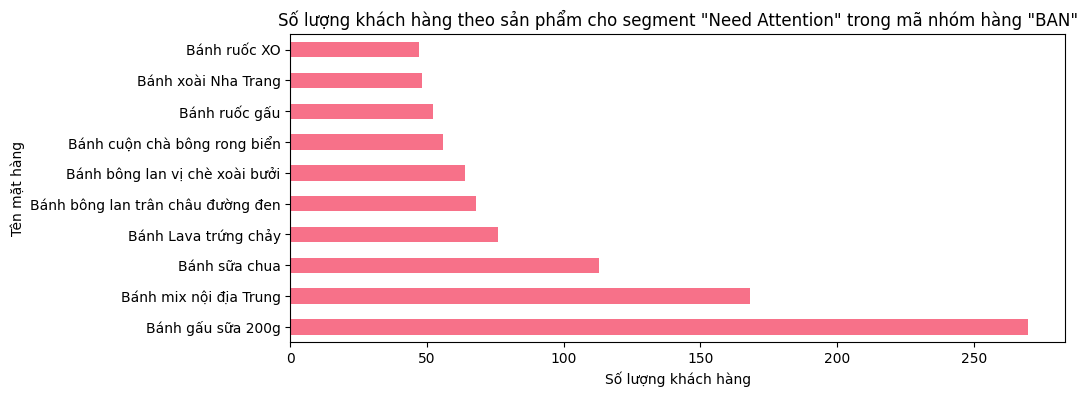

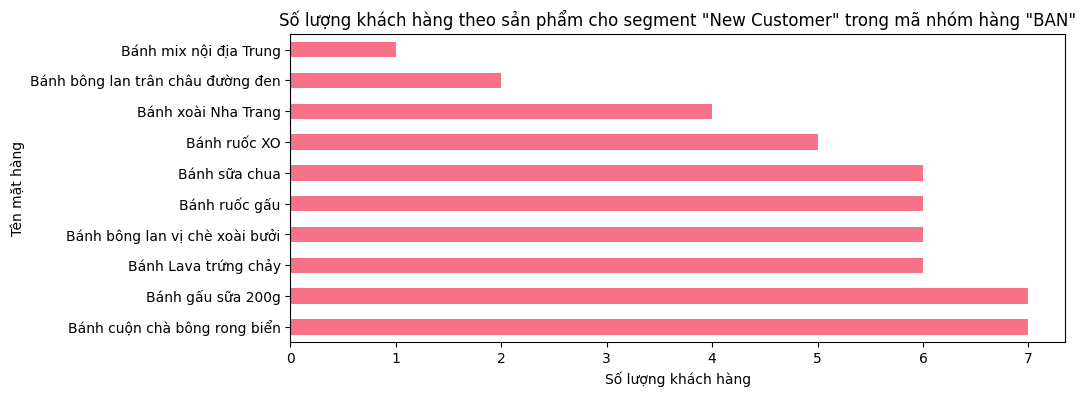

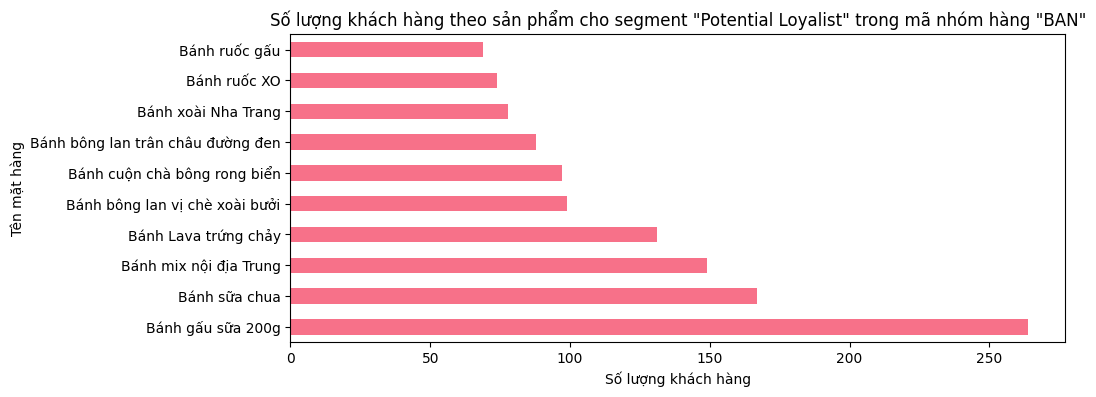

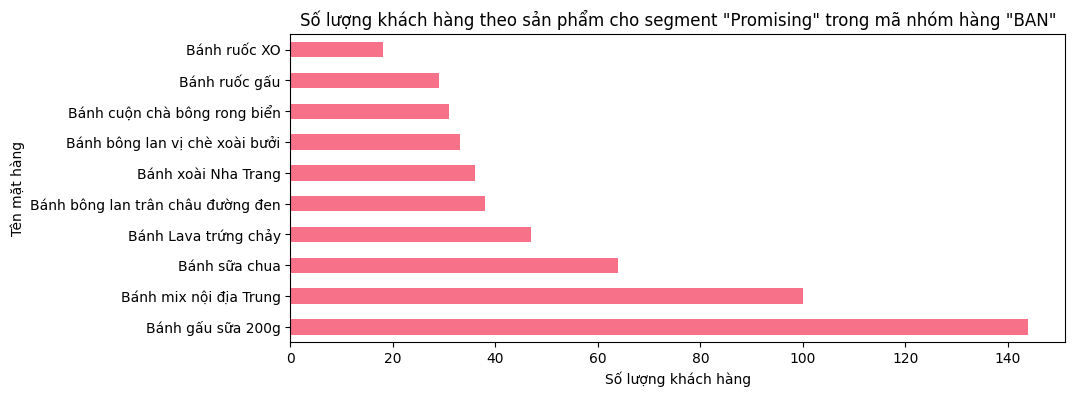

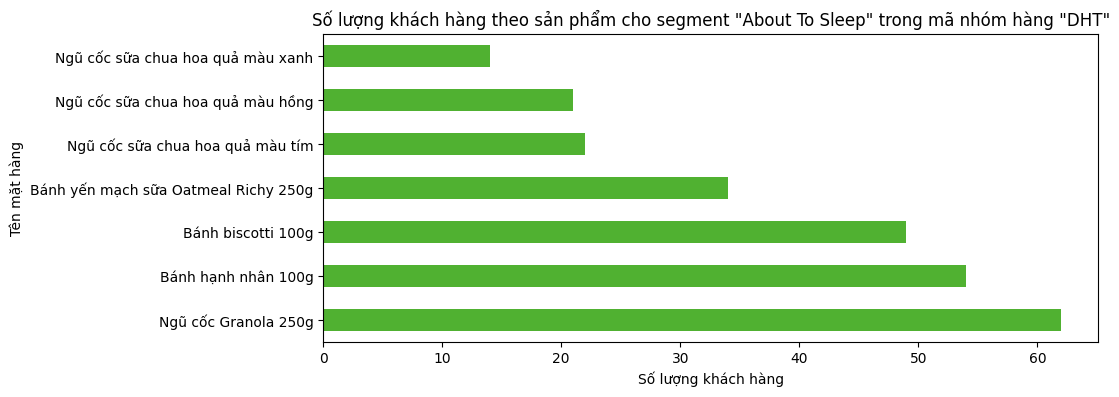

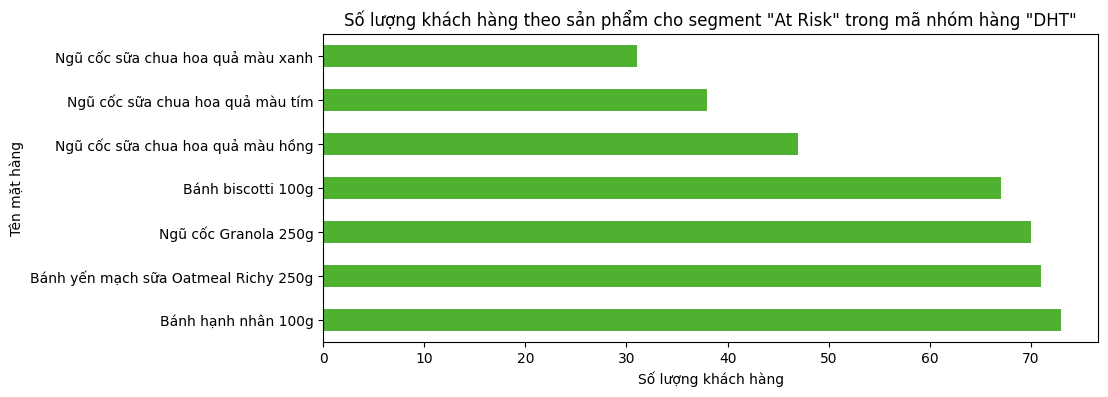

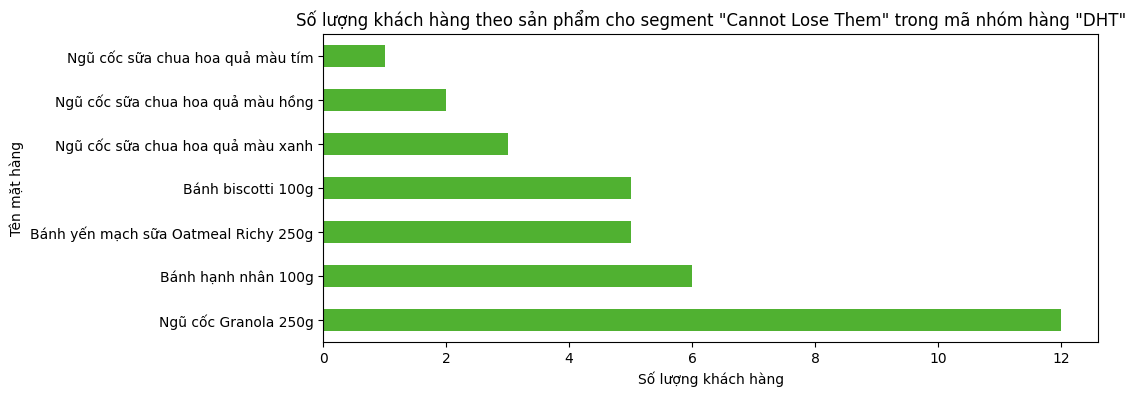

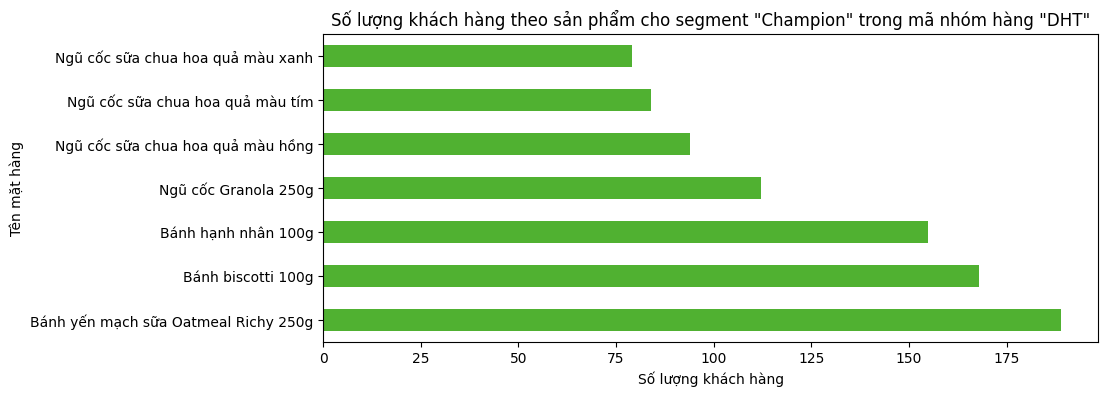

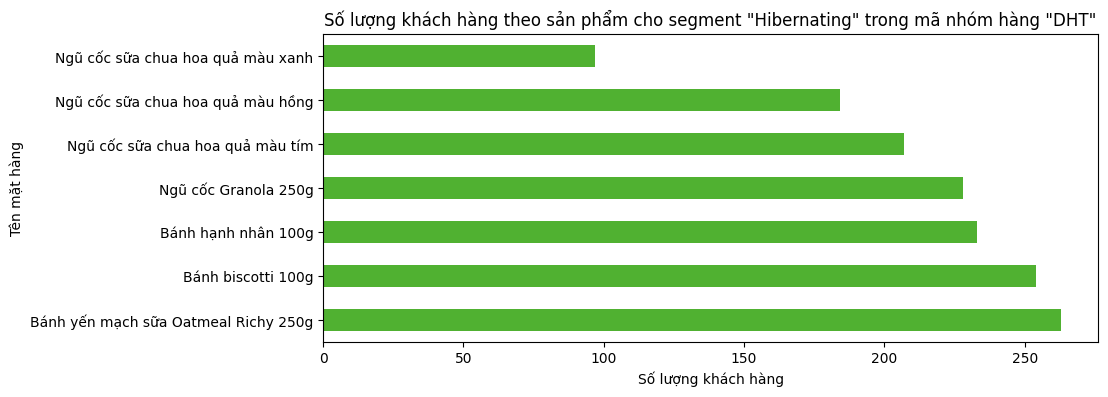

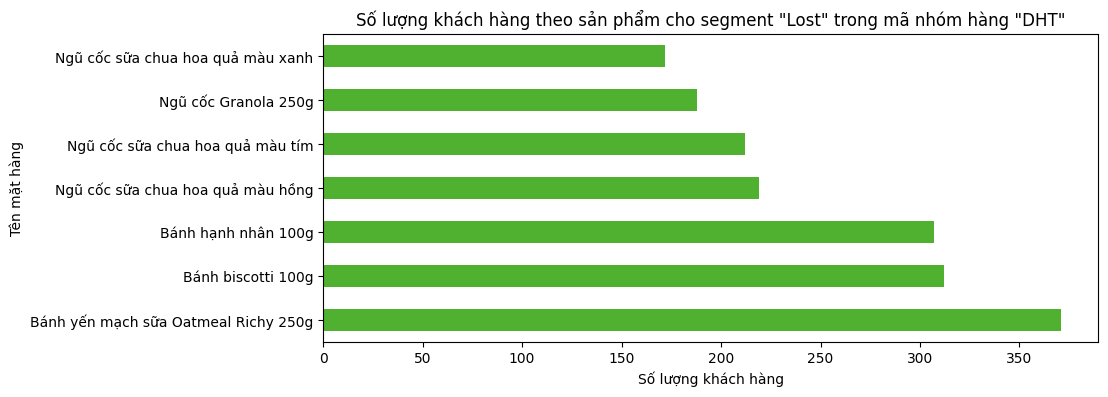

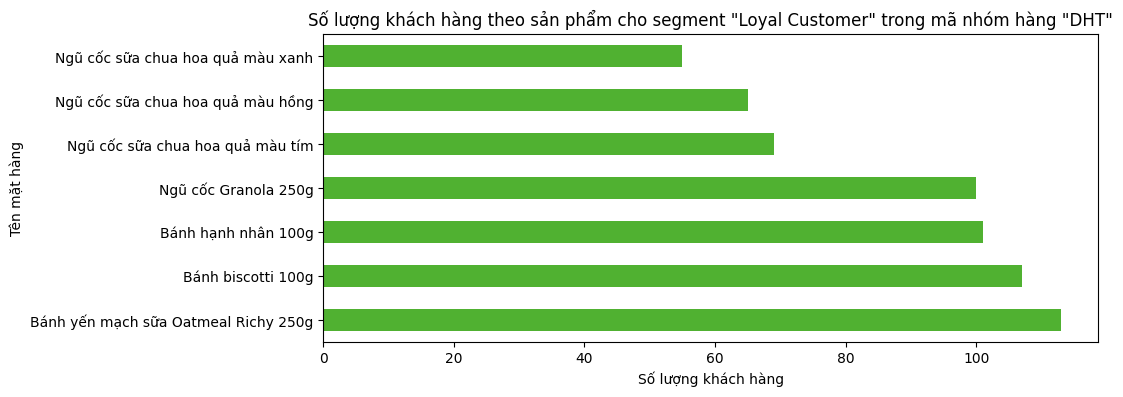

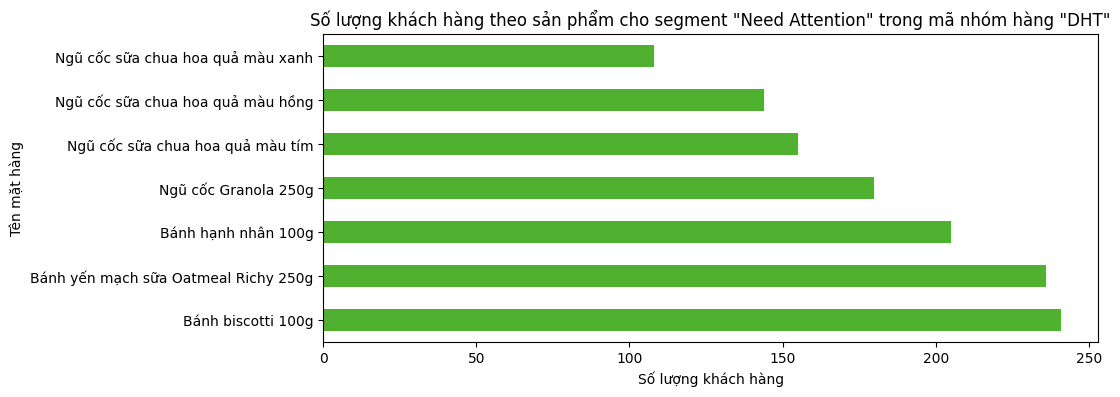

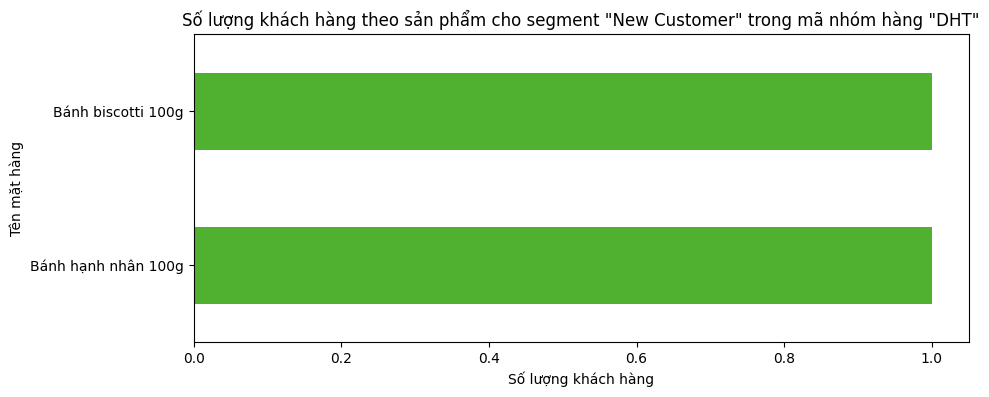

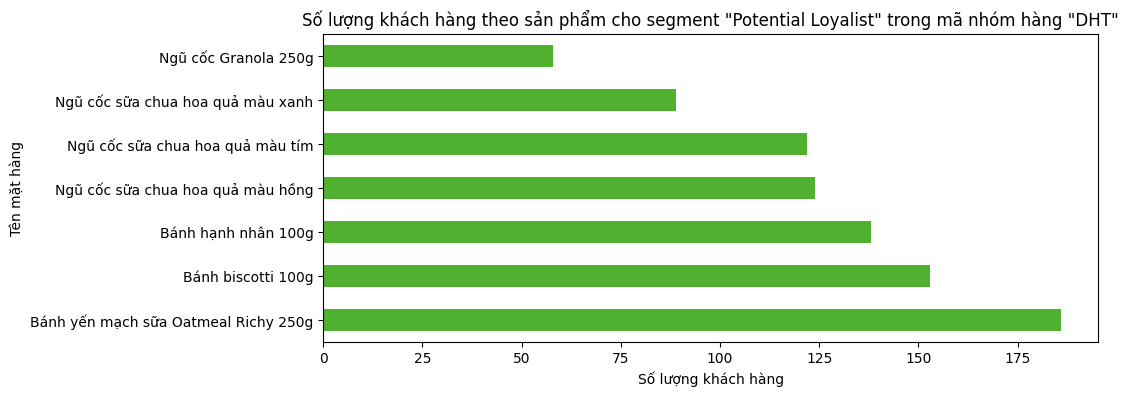

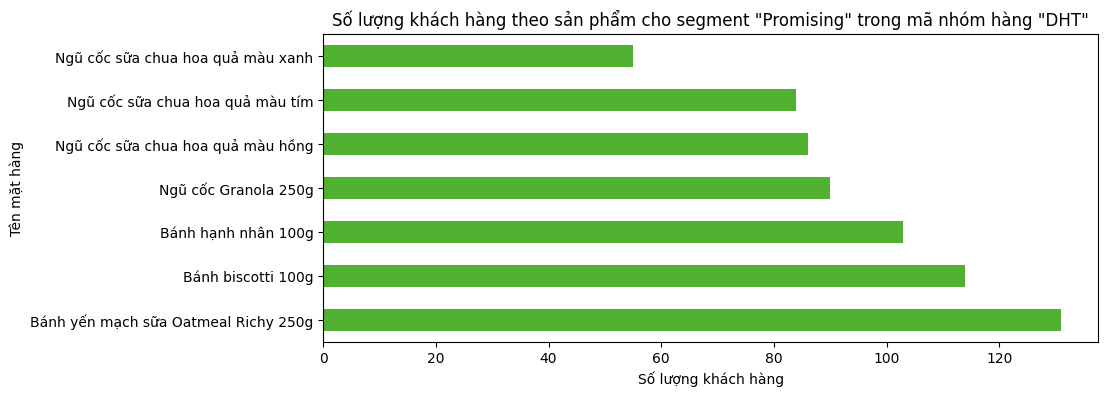

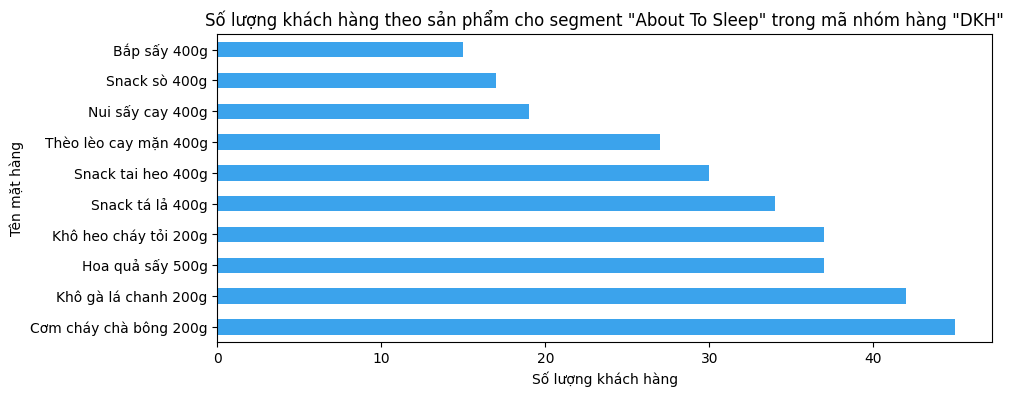

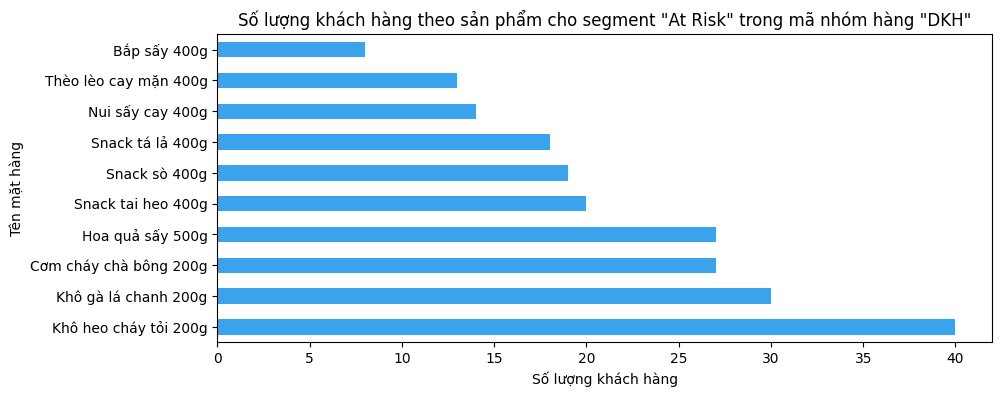

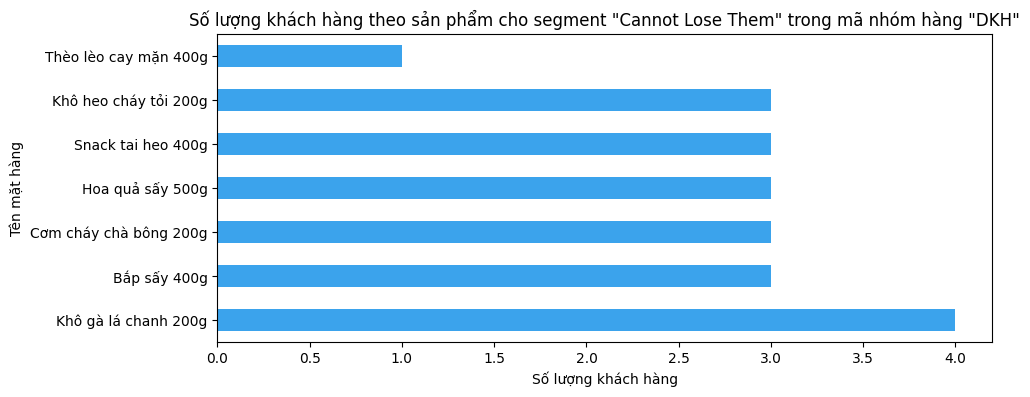

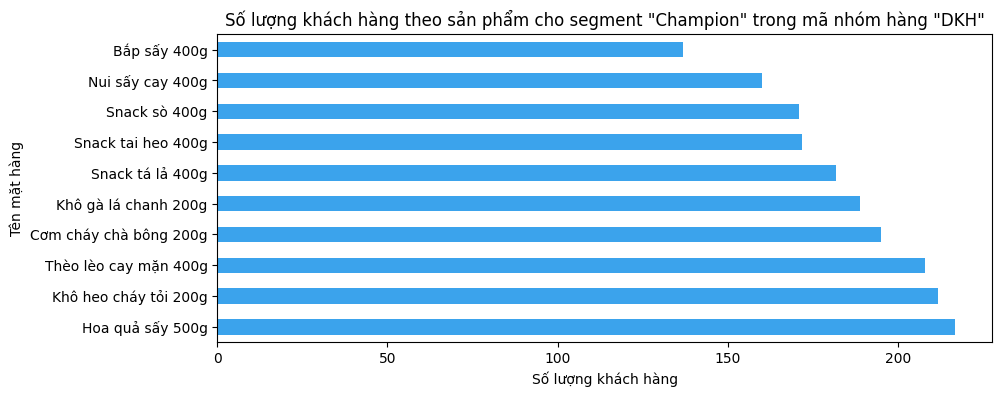

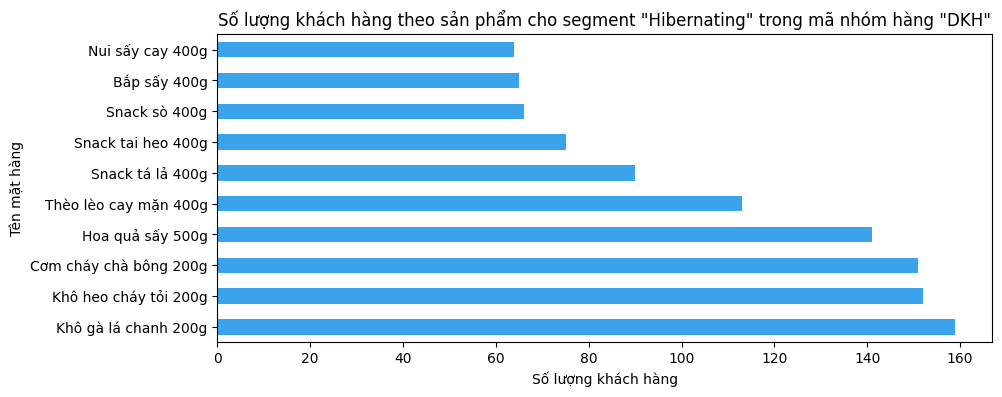

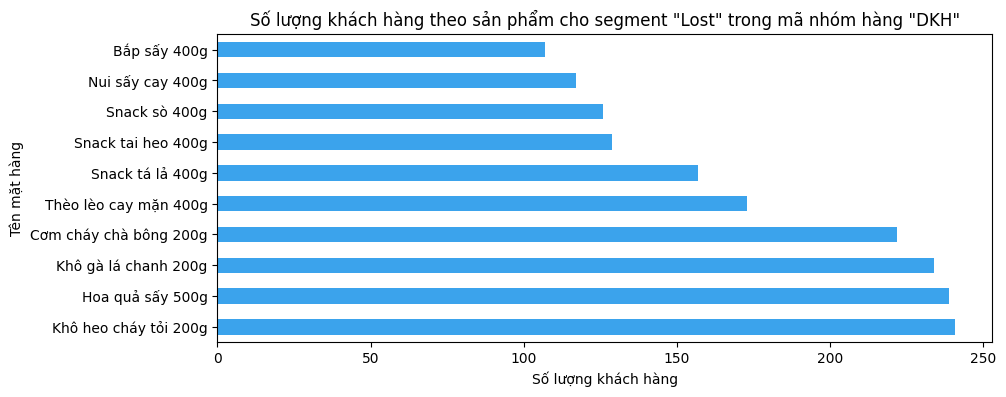

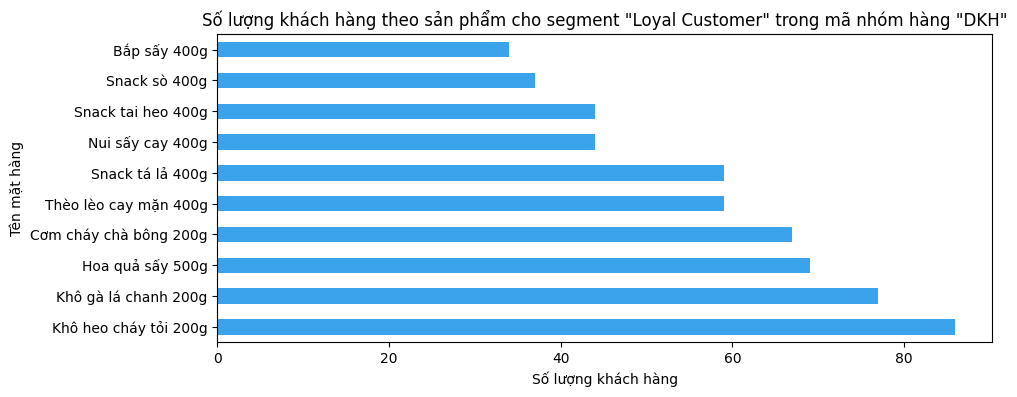

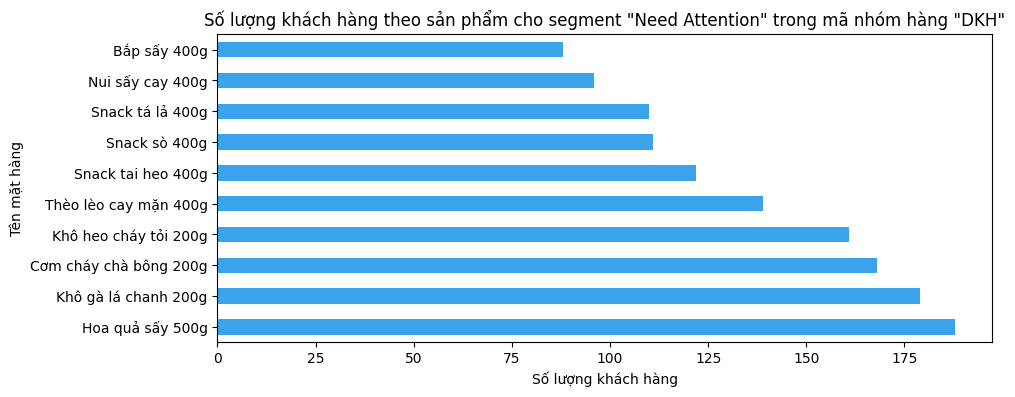

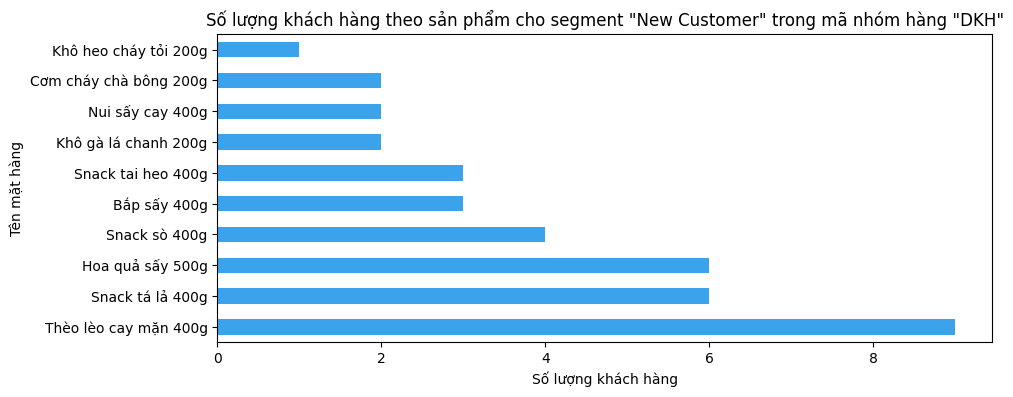

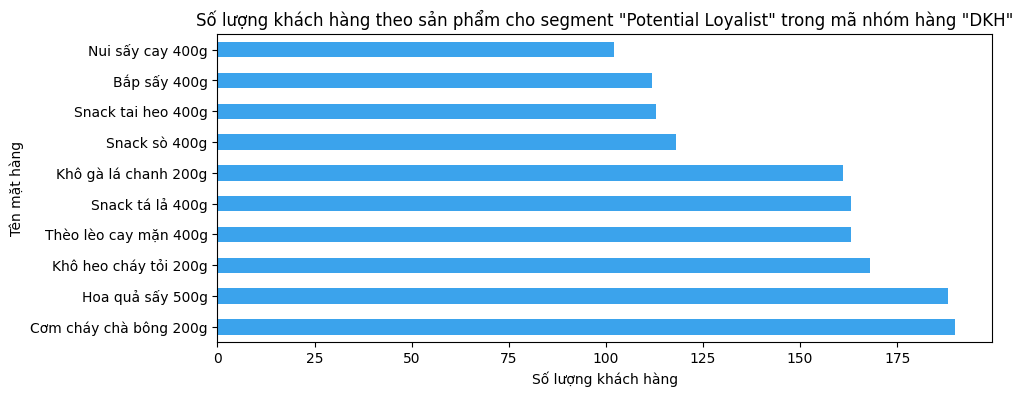

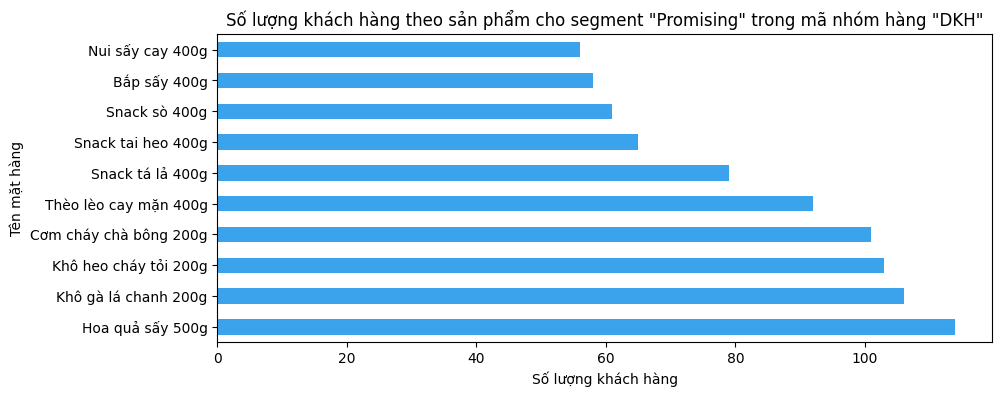

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
unique_group_codes = data['Mã nhóm hàng'].unique()
colors = sns.color_palette('husl', n_colors=len(unique_group_codes))
for i, group_code in enumerate(unique_group_codes):
    filtered_data = data[data['Mã nhóm hàng'] == group_code]
    customer_count = filtered_data.groupby(['Tên mặt hàng', 'Segment'])['Tên khách hàng'].nunique().sort_values(ascending=False)
    for segment in customer_count.index.levels[1]:
        ax = customer_count[:, segment].plot(kind='barh', figsize=(10, 4), color=colors[i])
        plt.xlabel('Số lượng khách hàng')
        plt.ylabel('Tên mặt hàng')
        plt.title(f'Số lượng khách hàng theo sản phẩm cho segment "{segment}" trong mã nhóm hàng "{group_code}"')
        plt.show()

**11.Xu hướng của phân khúc khách hàng**

**Tổng thể = All của Tableau**

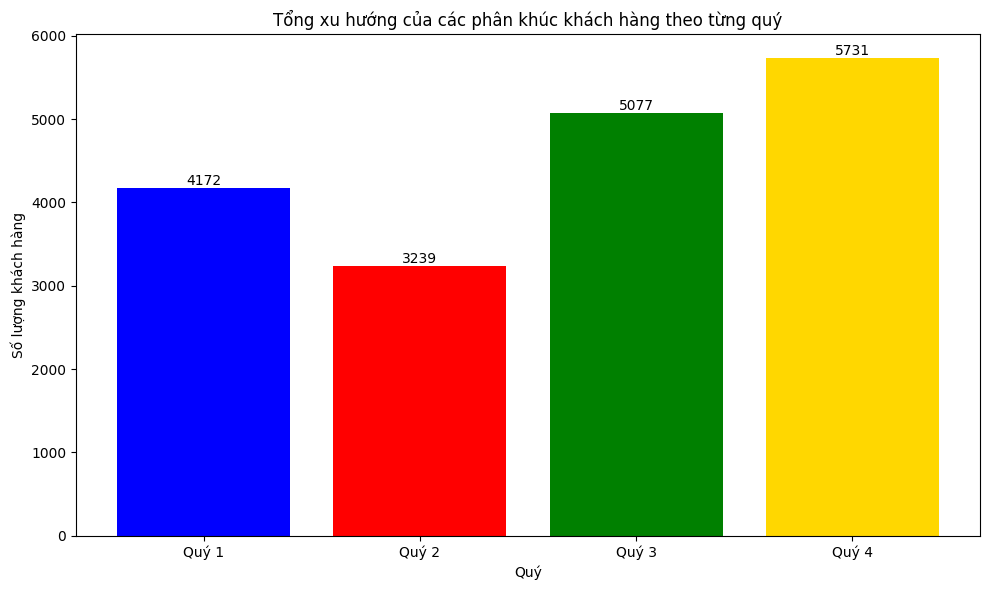

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data['Thời gian tạo đơn'] = pd.to_datetime(data['Thời gian tạo đơn'])
data['Quý'] = data['Thời gian tạo đơn'].dt.quarter
total_customer_trends = data.groupby('Quý')['Mã khách hàng'].nunique()
colors = ['blue', 'red', 'green', 'gold']
plt.figure(figsize=(10, 6))
bars = plt.bar(total_customer_trends.index, total_customer_trends.values, color=colors)
for bar, label in zip(bars, total_customer_trends.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}', ha='center', va='bottom')
plt.xlabel('Quý')
plt.ylabel('Số lượng khách hàng')
plt.title('Tổng xu hướng của các phân khúc khách hàng theo từng quý')
plt.xticks(range(1, 5), ['Quý 1', 'Quý 2', 'Quý 3', 'Quý 4'])
plt.tight_layout()
plt.show()

**Tất cả các cột còn lại**

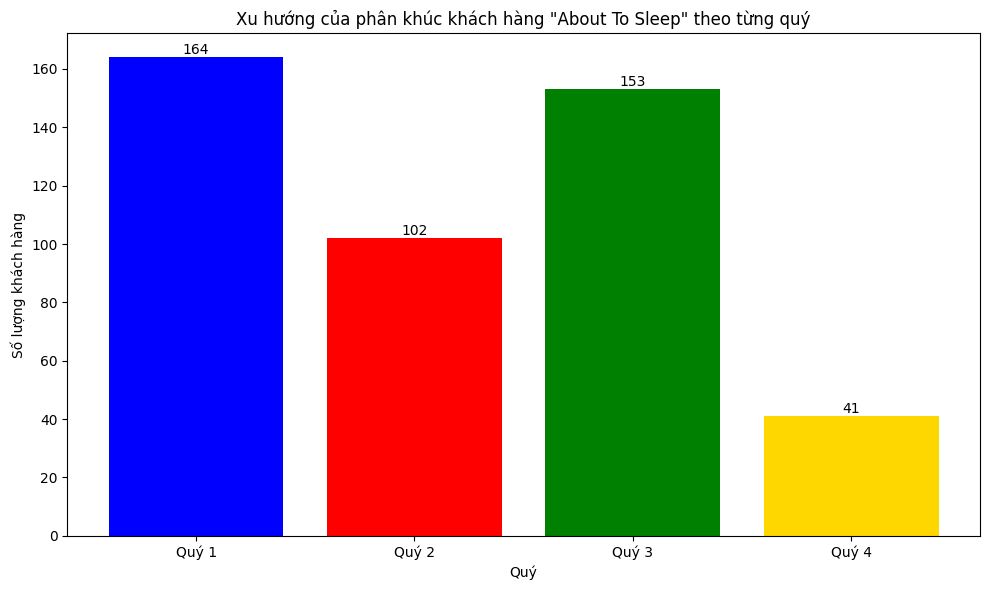

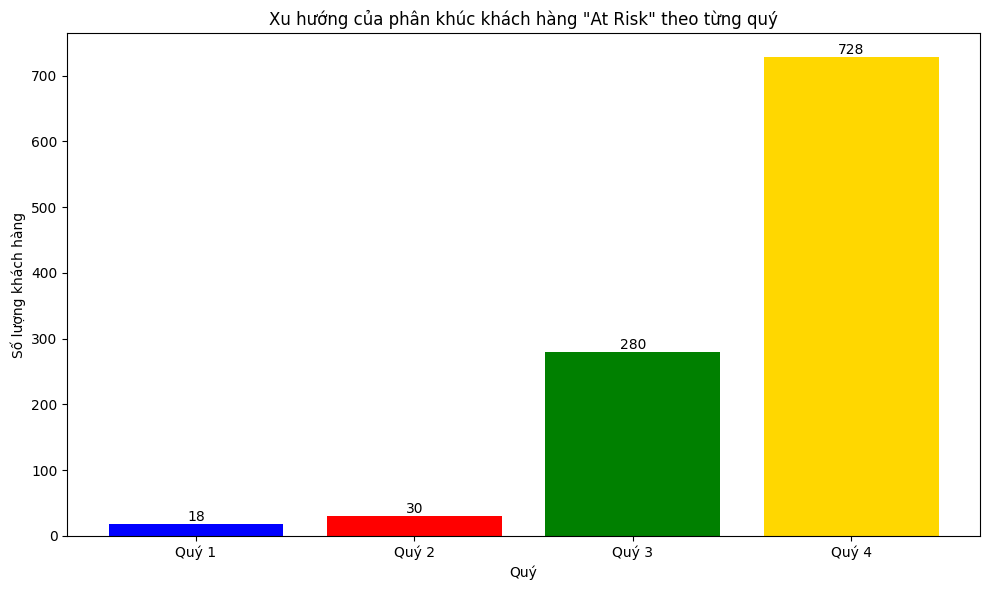

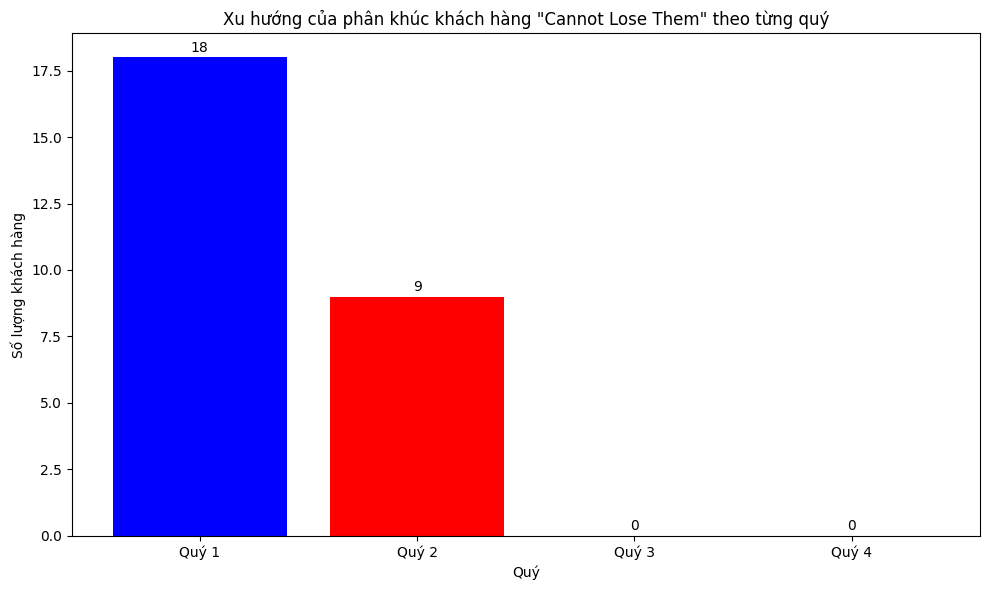

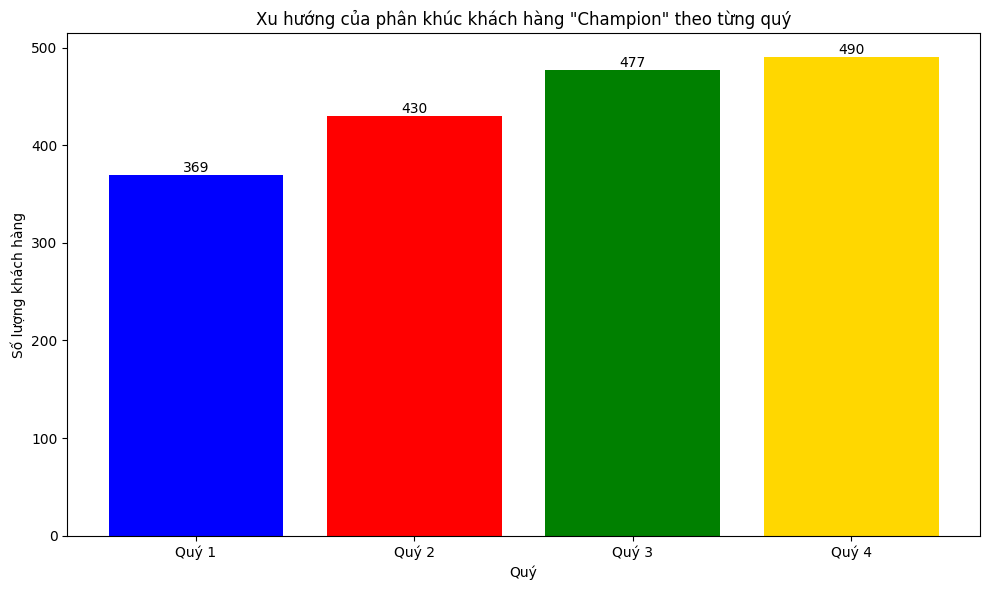

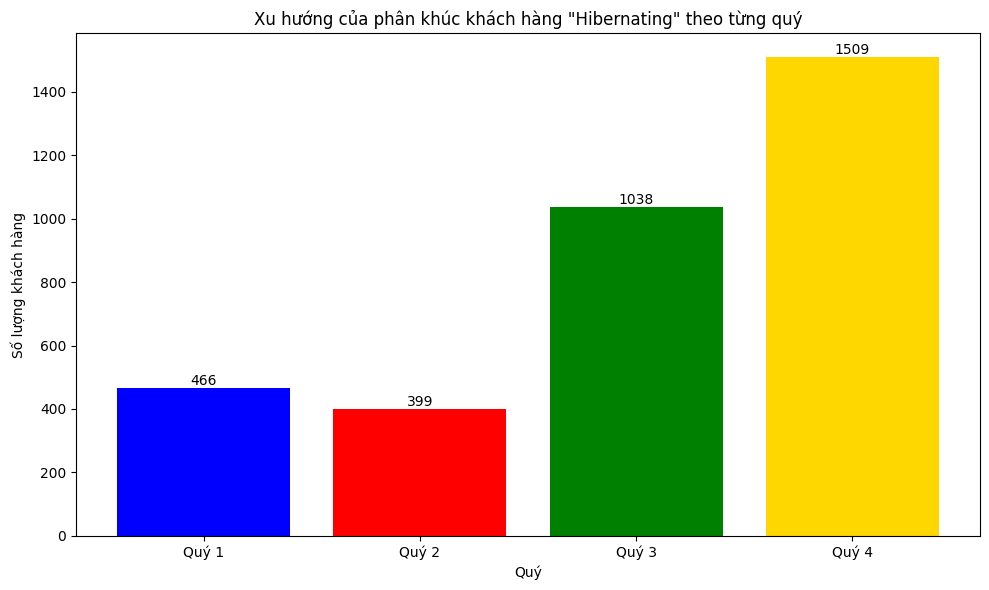

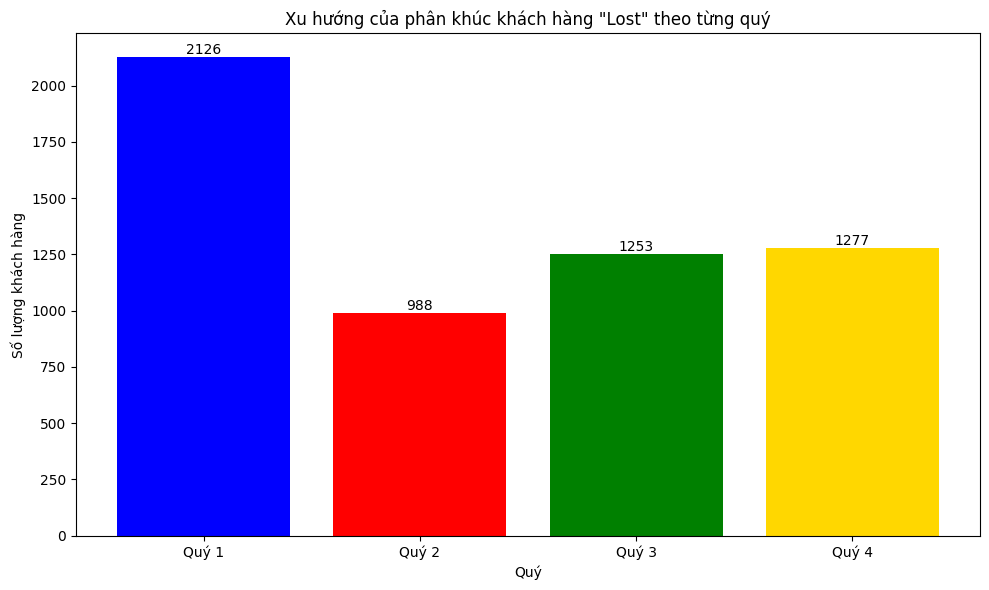

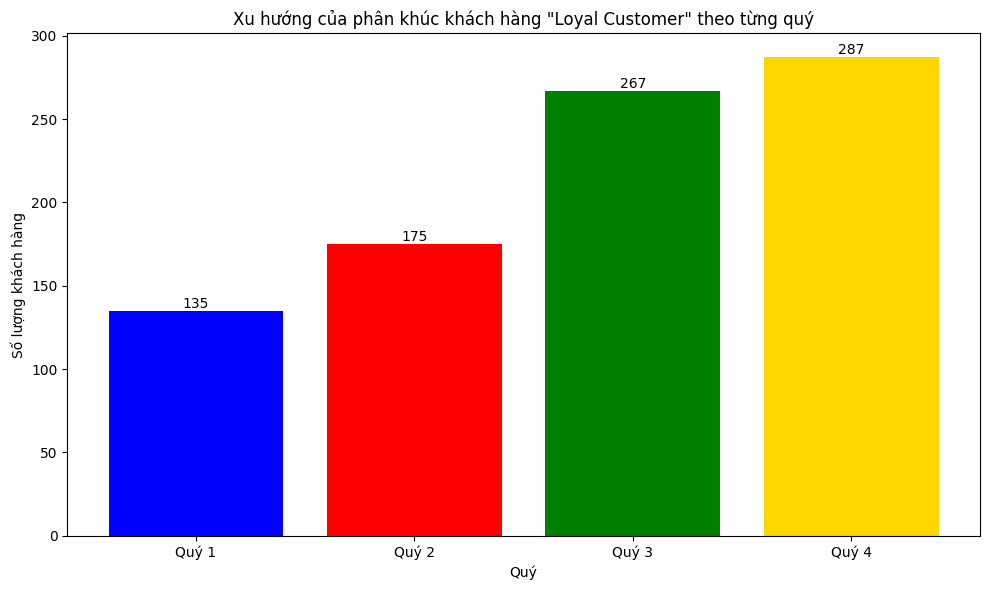

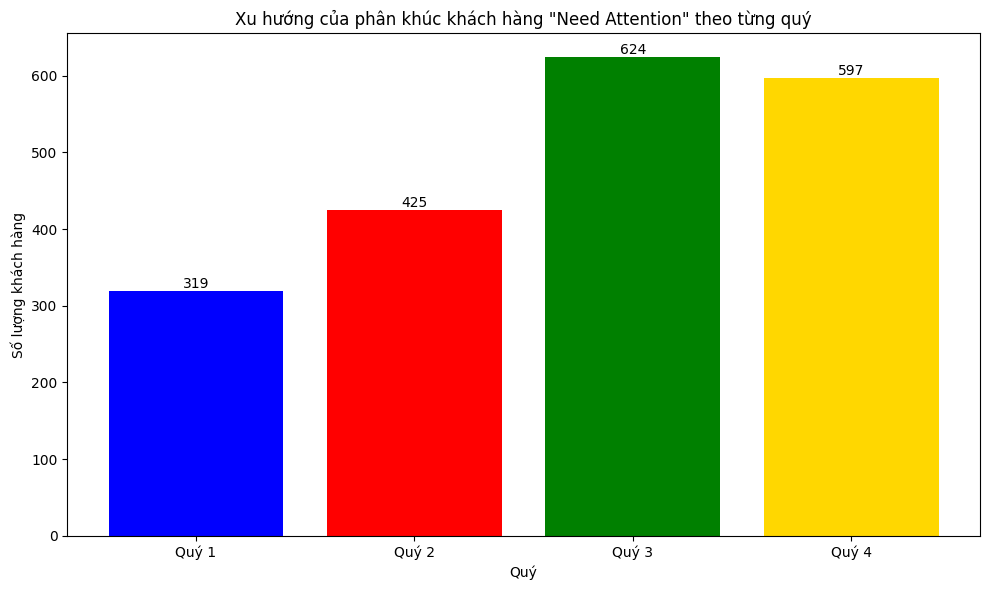

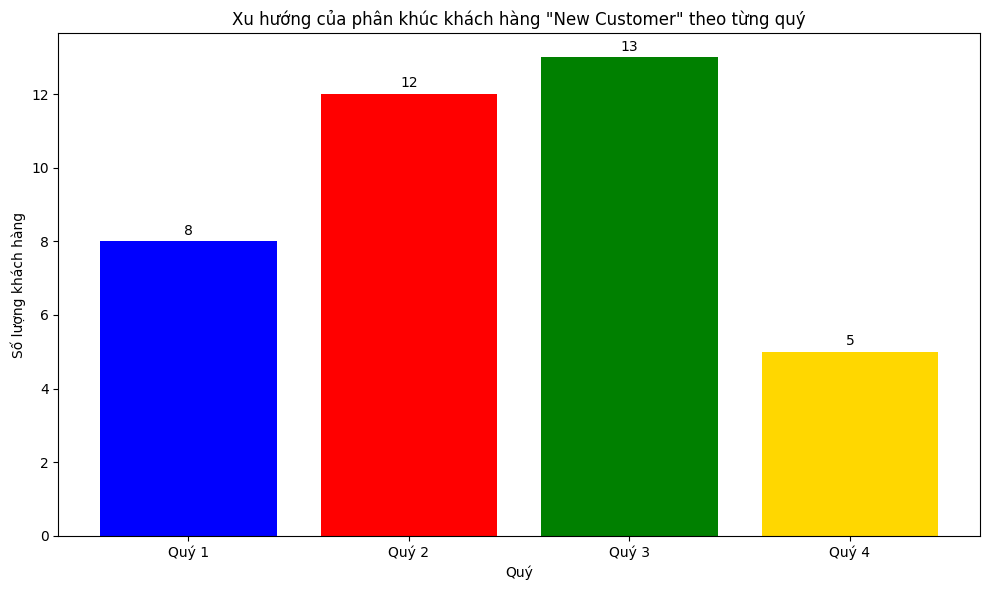

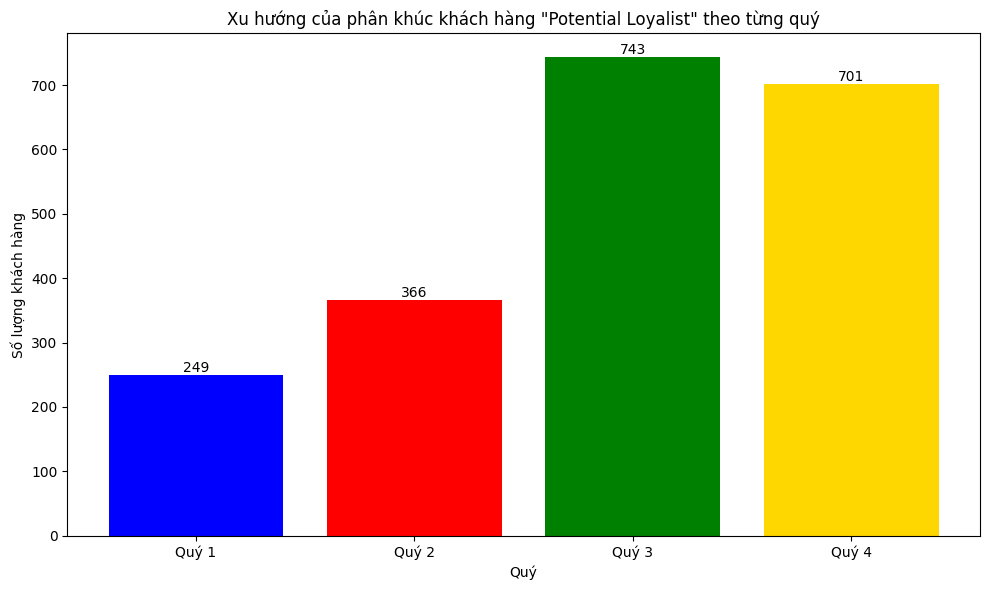

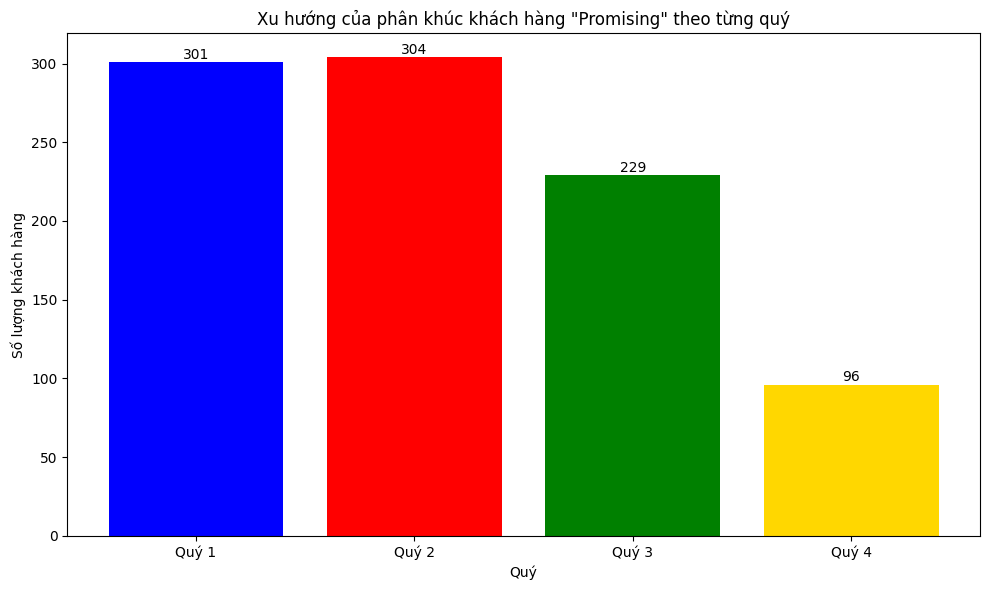

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data['Thời gian tạo đơn'] = pd.to_datetime(data['Thời gian tạo đơn'])
data['Quý'] = data['Thời gian tạo đơn'].dt.quarter
colors = ['blue', 'red', 'green', 'gold']
customer_trends = data.groupby(['Segment', 'Quý'])['Mã khách hàng'].nunique().unstack().fillna(0)
for segment in customer_trends.index:
    segment_data = customer_trends.loc[segment]
    plt.figure(figsize=(10, 6))
    bars = plt.bar(segment_data.index, segment_data.values, color=colors)
    for bar, label in zip(bars, segment_data.values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{int(label)}',
                 va='bottom', ha='center', fontsize=10)
    plt.xlabel('Quý')
    plt.ylabel('Số lượng khách hàng')
    plt.title(f'Xu hướng của phân khúc khách hàng "{segment}" theo từng quý')
    plt.xticks(range(1, 5), ['Quý 1', 'Quý 2', 'Quý 3', 'Quý 4'])
    plt.tight_layout()
    plt.show()

**12.Lợi nhuận đến từ các nhóm hàng**

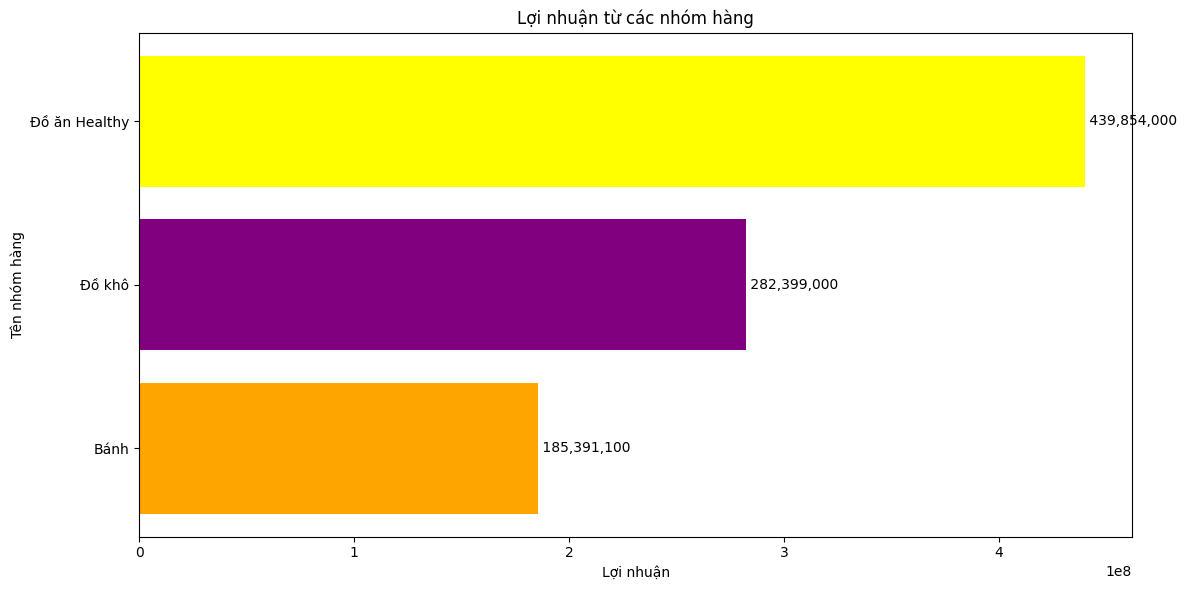

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data['Lợi nhuận'] = data['Amount'] - data['Đơn giá nhập']
profit_by_group = data.groupby('Tên nhóm hàng')['Lợi nhuận'].sum().reset_index()
colors = ['orange', 'purple', 'yellow']
plt.figure(figsize=(12, 6))
bars = plt.barh(profit_by_group['Tên nhóm hàng'], profit_by_group['Lợi nhuận'], color=colors)
for bar, label in zip(bars, profit_by_group['Lợi nhuận']):
    plt.text(label, bar.get_y() + bar.get_height() / 2, f'{label: ,}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Lợi nhuận')
plt.ylabel('Tên nhóm hàng')
plt.title('Lợi nhuận từ các nhóm hàng')
plt.tight_layout()
plt.show()

**13.Pareto : Lợi nhuận của từng loại sản phẩm**

<ipython-input-18-58b8da218d67>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', n_colors)


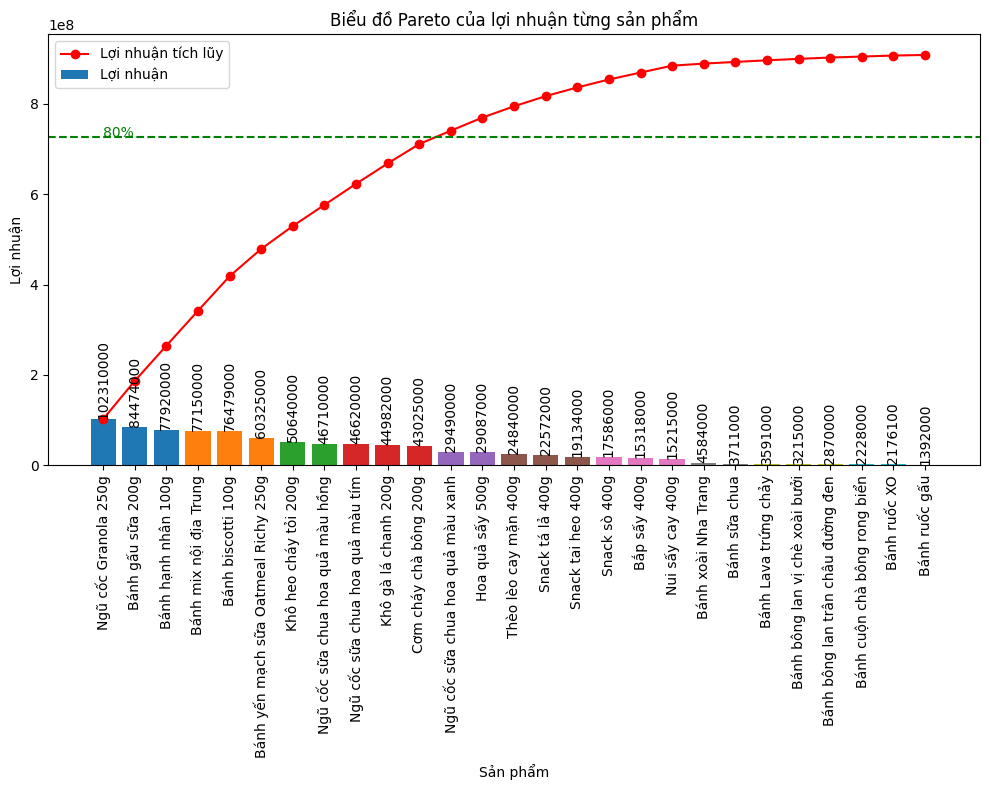

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data['Lợi nhuận'] = data['Amount'] - data['Đơn giá nhập']
profit_per_product = data.groupby('Tên mặt hàng')['Lợi nhuận'].sum().sort_values(ascending=False)
sorted_products = profit_per_product.index
cumulative_profit = profit_per_product.cumsum()

# Tạo bảng màu (palette) cho mỗi tên mặt hàng
n_colors = len(sorted_products)
color_palette = plt.cm.get_cmap('tab10', n_colors)

plt.figure(figsize=(10, 8))

# Vẽ biểu đồ cột
bars = plt.bar(sorted_products, profit_per_product, color=color_palette(np.arange(n_colors)))

# Thêm label tổng lợi nhuận lên trên từng cột và xoay chúng 90 độ
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, round(height, 2),
             ha='center', va='bottom', rotation=90)

# Vẽ biểu đồ đường
plt.plot(sorted_products, cumulative_profit, color='r', marker='o')

plt.title('Biểu đồ Pareto của lợi nhuận từng sản phẩm')
plt.xlabel('Sản phẩm')
plt.ylabel('Lợi nhuận')
plt.xticks(rotation=90)
plt.legend(['Lợi nhuận tích lũy', 'Lợi nhuận'], loc='upper left')

# Thêm đường ngang tại giá trị 80% tổng lợi nhuận
total_profit = cumulative_profit.max()
eighty_percent_profit = total_profit * 0.8
plt.axhline(y=eighty_percent_profit, color='g', linestyle='--')
plt.text(0, eighty_percent_profit + 5000, '80%', color='g')

plt.tight_layout()
plt.show()


**14.Doanh thu theo tháng trong năm**

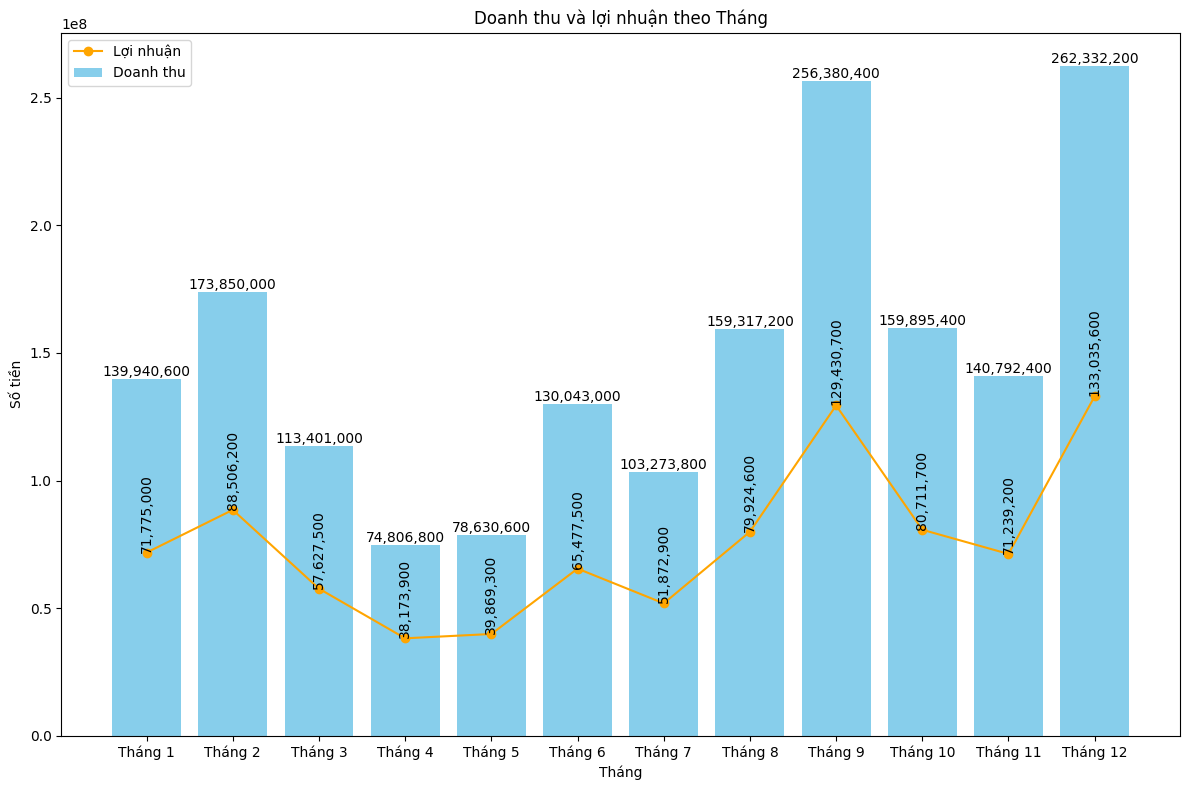

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
data['Thời gian tạo đơn'] = pd.to_datetime(data['Thời gian tạo đơn'])
data['Tháng'] = data['Thời gian tạo đơn'].dt.month
revenue_profit_by_month = data.groupby('Tháng').agg({'Amount': 'sum', 'Lợi nhuận': 'sum'}).reset_index()
plt.figure(figsize=(12, 8))
plt.bar(revenue_profit_by_month['Tháng'], revenue_profit_by_month['Amount'], color='skyblue', label='Doanh thu')
for i, amount in enumerate(revenue_profit_by_month['Amount']):
    plt.text(i + 1, amount, f'{amount:,.0f}', ha='center', va='bottom', fontsize=10)
plt.plot(revenue_profit_by_month['Tháng'], revenue_profit_by_month['Lợi nhuận'], color='orange', marker='o', label='Lợi nhuận')
for i, profit in enumerate(revenue_profit_by_month['Lợi nhuận']):
    plt.text(i + 1, profit, f'{profit:,.0f}', ha='center', va='bottom', fontsize=10,rotation=90)
plt.xlabel('Tháng')
plt.ylabel('Số tiền')
plt.title('Doanh thu và lợi nhuận theo Tháng')
plt.legend()
plt.xticks(range(1, 13), ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4','Tháng 5','Tháng 6','Tháng 7','Tháng 8','Tháng 9','Tháng 10','Tháng 11','Tháng 12'])  # Gán nhãn cho trục x
plt.tight_layout()
plt.show()

**15.Tỷ lệ lợi nhuận gộp của phân khúc khách hàng**

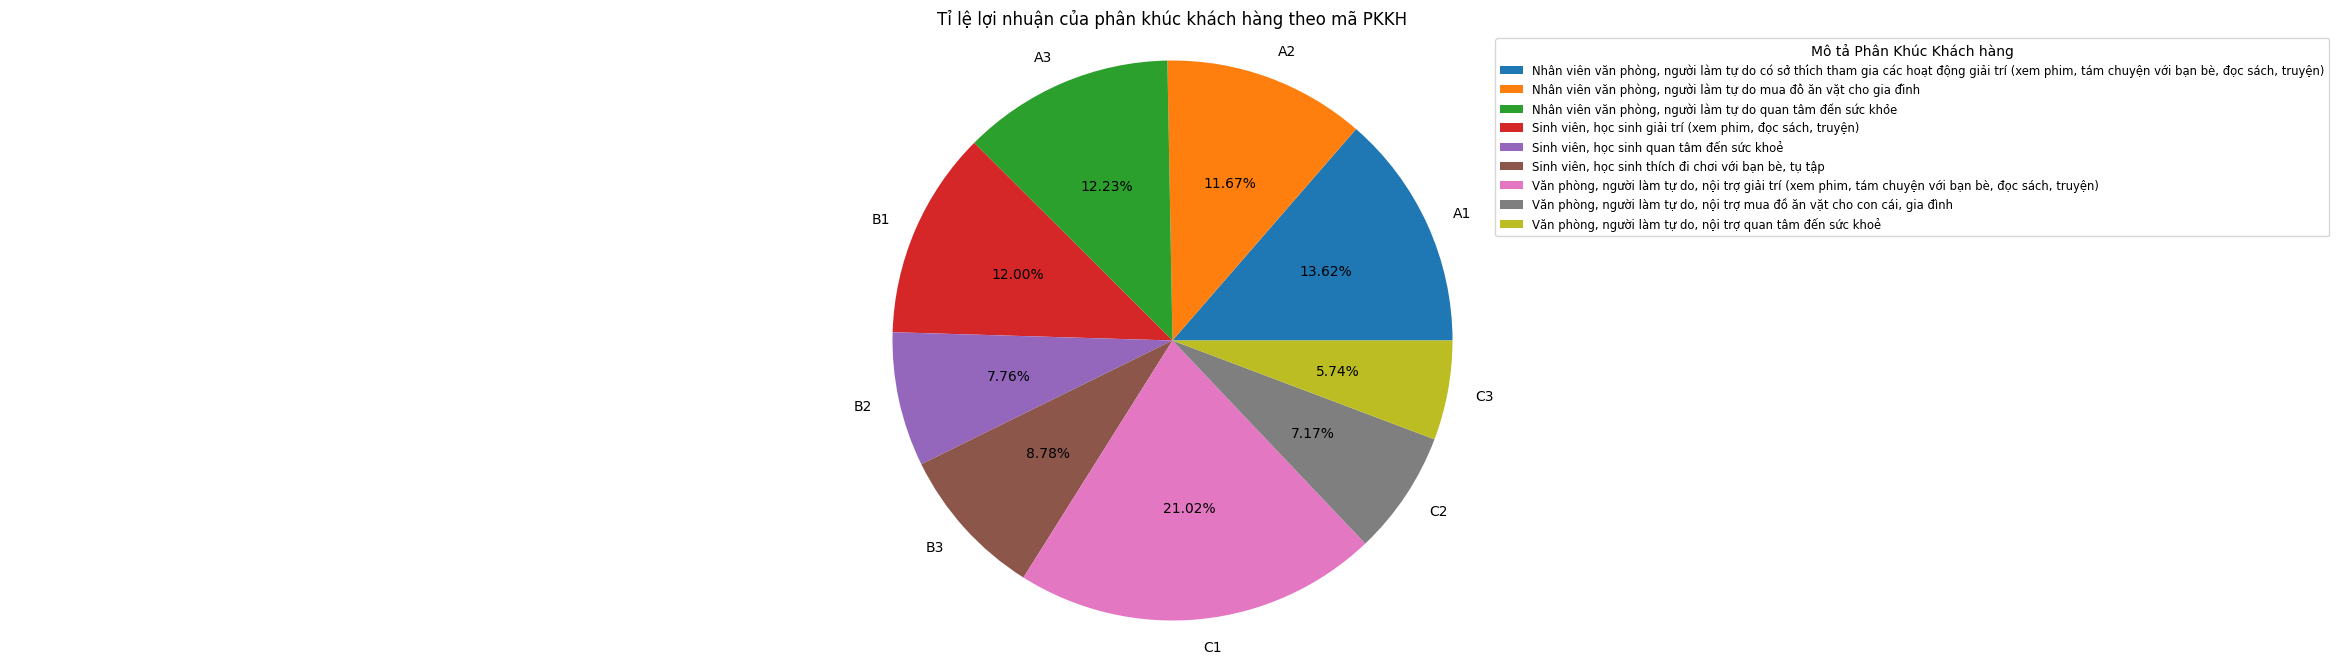

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
data['Lợi nhuận'] = data['Amount'] - data['Đơn giá nhập']
total_profit_by_segment = data.groupby('Mã PKKH')['Lợi nhuận'].sum()
total_profit = total_profit_by_segment.sum()
profit_percentages = (total_profit_by_segment / total_profit) * 100
plt.figure(figsize=(30, 8))
plt.pie(profit_percentages, labels=profit_percentages.index, autopct='%1.2f%%')
plt.title('Tỉ lệ lợi nhuận của phân khúc khách hàng theo mã PKKH')
plt.axis('equal')
legend_labels = revenue_by_group['Mô tả Phân Khúc Khách hàng']
plt.legend(legend_labels, title='Mô tả Phân Khúc Khách hàng', loc='upper right', fontsize='small')
plt.show()

**16.Tỷ lệ Đơn hàng trong nhóm hàng**

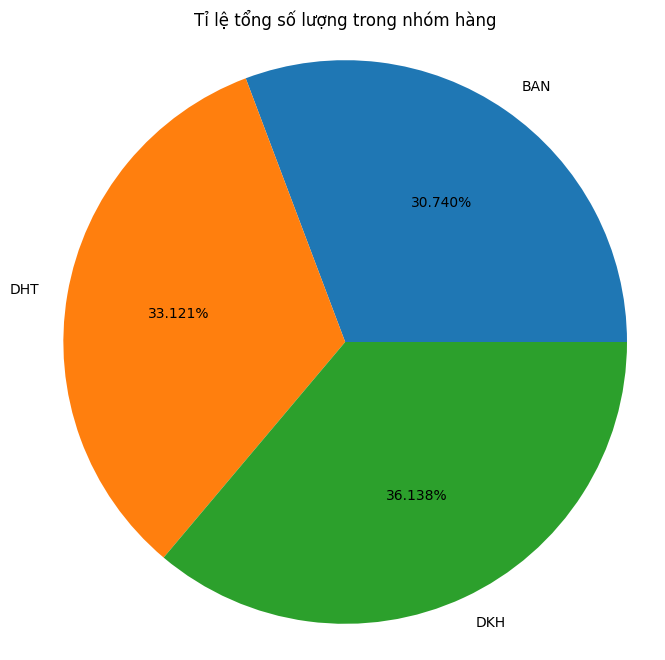

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
total_quantity_by_group = data.groupby('Mã nhóm hàng')['SL'].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_quantity_by_group, labels=total_quantity_by_group.index, autopct='%1.3f%%')
plt.title('Tỉ lệ tổng số lượng trong nhóm hàng')
plt.axis('equal')
plt.show()

**17.Tỷ Lệ Mua Trung Bình của Món Hàng trong Nhóm Hàng trên mỗi Đơn Hàng(Đang sai)**

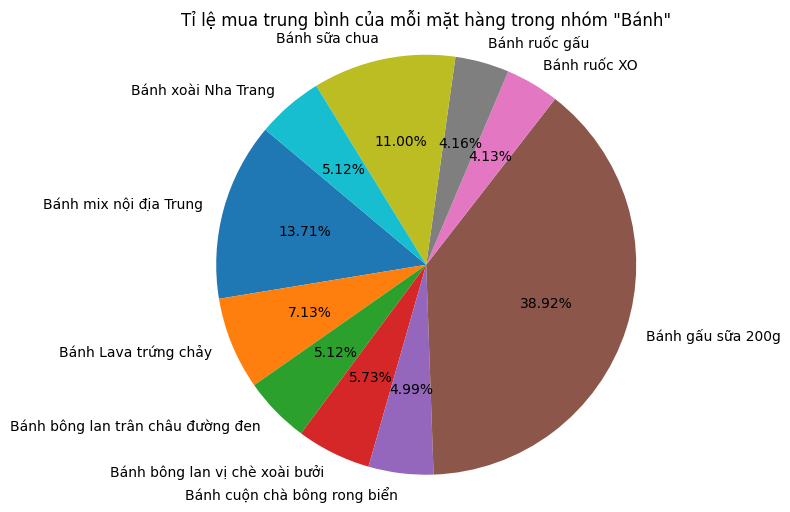

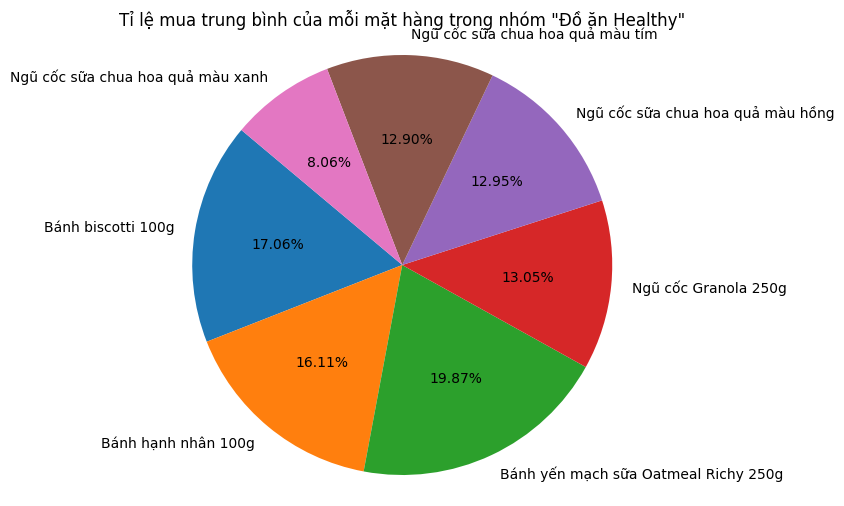

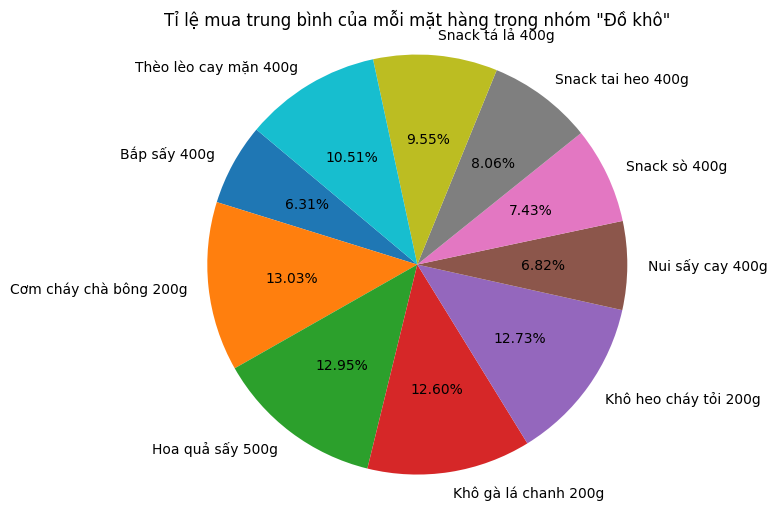

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
average_data = data.groupby(['Tên nhóm hàng', 'Tên mặt hàng', 'OrderID'])['SL'].mean().reset_index()
average_data = data[data['Tên nhóm hàng'] == 'Đồ khô']
total_average_data = average_data.groupby('Tên mặt hàng')['SL'].sum()
groups = data['Tên nhóm hàng'].unique()
for group in groups:
    plt.figure(figsize=(8, 6))
    group_data = data[data['Tên nhóm hàng'] == group]
    total_group_data = group_data.groupby('Tên mặt hàng')['SL'].sum()
    labels = total_group_data.index
    sizes = total_group_data.values
    plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Tỉ lệ mua trung bình của mỗi mặt hàng trong nhóm "{group}"')
    plt.show()